In [1]:
from _config import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.manifold import TSNE

-------------------------------------------------
----- Environment variables from .env file: -----
-------------------------------------------------
-------------------------------------------------


In [2]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

### Start with Spring (1)

In [3]:
#Start with spring and work our way down to winter
season = 1
season_year = 2015
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids] 
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2015-03-01 to 2015-05-31
Columns: 267 entries, 10000009 to 9001110
dtypes: float64(267)
memory usage: 192.6 KB


None

            10000009  10000010  10000011  10000014  10000016  10000017  \
2015-03-01  1.449602  1.085319  1.221005  1.164874  0.754665  0.742914   
2015-03-02  1.790287  1.425057  1.798857  1.383761  0.907128  0.893002   
2015-03-03  1.754920  1.360234  1.540727  1.322012  0.798435  0.786002   
2015-03-04  1.482176  1.133810  1.185541  1.193744  0.733828  0.722401   
2015-03-05  1.314592  1.002881  1.006702  1.094119  0.683394  0.672752   
...              ...       ...       ...       ...       ...       ...   
2015-05-27  0.837625  0.593206  0.322613  0.791330  0.437473  0.430661   
2015-05-28  0.838590  0.605716  0.324687  0.804392  0.461506  0.454319   
2015-05-29  0.906052  0.663436  0.335574  0.856550  0.489071  0.481455   
2015-05-30  1.175156  0.890395  0.421909  1.211200  0.692815  0.682027   
2015-05-31  1.110395  0.848781  0.334652  1.044060  0.542355  0.533909   

            11000011  11000016  12000001  12000195  ...  64000025  66000014  \
2015-03-01  1.952813  2.141031  

          2015-03-01  2015-03-02  2015-03-03  2015-03-04  2015-03-05  \
10000009    0.052875    0.253284    0.135965   -0.208623   -0.386246   
10000010   -0.482725   -0.227387   -0.376473   -0.660703   -0.781841   
10000011   -0.283227    0.264563   -0.142131   -0.593571   -0.776991   
10000014   -0.365756   -0.281737   -0.426098   -0.582926   -0.666051   
10000016   -0.968879   -0.909024   -1.105882   -1.179766   -1.187305   
...              ...         ...         ...         ...         ...   
7000003     0.327882    0.605039    0.934410    0.537495    0.171431   
8000001     0.442203    0.748643    0.834499    0.297161    0.031530   
9000001     1.757986    2.078242    2.545771    1.697742    0.915210   
9000015     1.550699    1.828640    2.251212    1.476744    0.765585   
9001110     0.027187    0.373725    0.733136    0.079023   -0.482965   

          2015-03-06  2015-03-07  2015-03-08  2015-03-09  2015-03-10  ...  \
10000009   -0.353590   -0.292610   -0.236656   -0.182899  

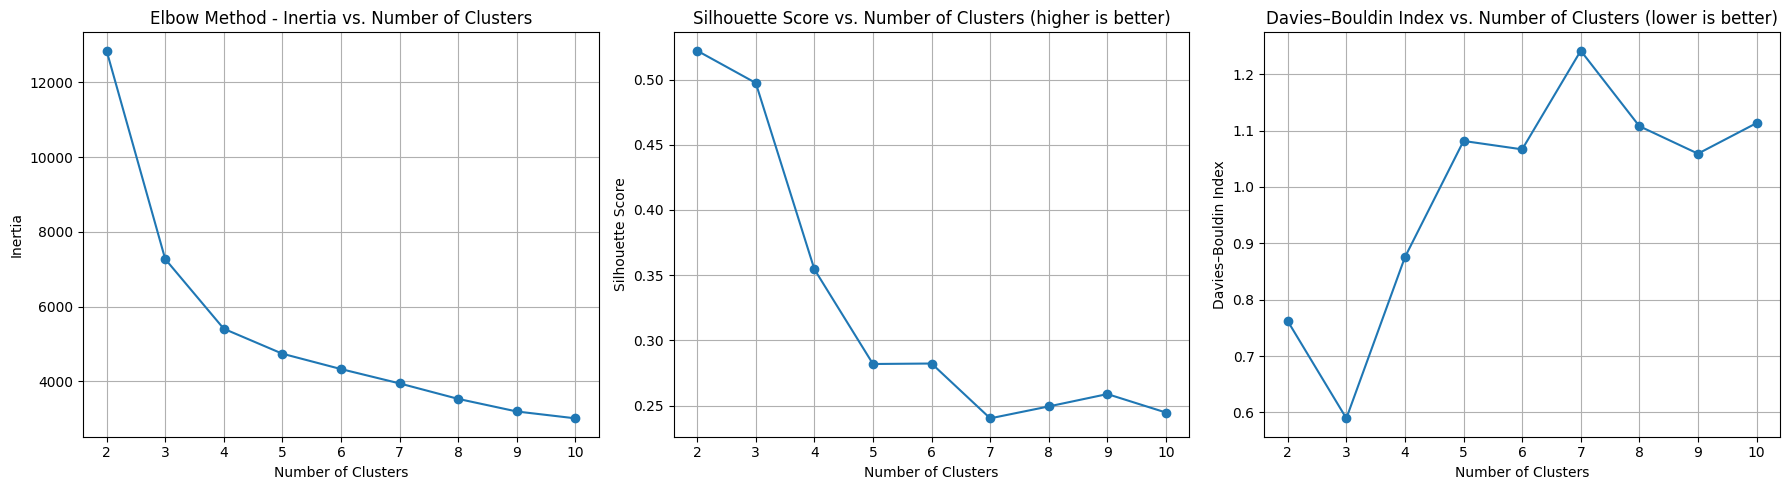

In [4]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
#import numpy as np

# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        0
10000010        0
10000011        2
10000014        0
10000016        2

            10000009  10000010  10000011  10000014  10000016  10000017  \
2015-03-01  1.449602  1.085319  1.221005  1.164874  0.754665  0.742914   
2015-03-02  1.790287  1.425057  1.798857  1.383761  0.907128  0.893002   
2015-03-03  1.754920  1.360234  1.540727  1.322012  0.798435  0.786002   
2015-03-04  1.482176  1.133810  1.185541  1.193744  0.733828  0.722401   
2015-03-05  1.314592  1.002881  1.006702  1.094119  0.683394  0.672752   
...              ...       ...       ...       ...       ...       ...   
2015-05-27  0.837625  0.593206  0.322613  0.791330  0.437473  0.430661   
2015-05-28  0.838590  0.605716  0.324687  0.804392  0.461506  0.454319   
2015-05-29  0.906052  0.663436  0.335574  0.856550  0.489071  0.481455   
2015-05-30  1.175156  0.890395  0.421909  1.211200  0.692815  0.682027   
2015-05-31  1.110395  0.848781  0.334652  1.044060  0.542355  0.533909   

            11000011  11000016  12000001  12000195  ...  64000025  66000014  \
2015-03-01  1.952813  2.141031  

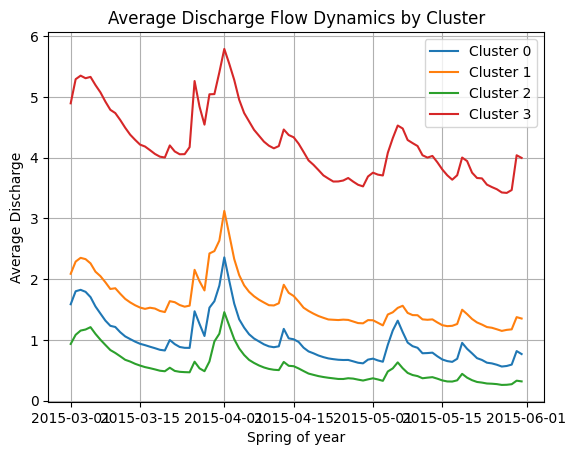

In [5]:
kmeans_final = KMeans(n_clusters=4, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure()
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Spring of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)
#print(out_path)

In [7]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009  10000010  10000011  10000014  10000016  10000017  \
2015-03-01  1.449602  1.085319  1.221005  1.164874  0.754665  0.742914   
2015-03-02  1.790287  1.425057  1.798857  1.383761  0.907128  0.893002   
2015-03-03  1.754920  1.360234  1.540727  1.322012  0.798435  0.786002   
2015-03-04  1.482176  1.133810  1.185541  1.193744  0.733828  0.722401   
2015-03-05  1.314592  1.002881  1.006702  1.094119  0.683394  0.672752   
...              ...       ...       ...       ...       ...       ...   
2015-05-27  0.837625  0.593206  0.322613  0.791330  0.437473  0.430661   
2015-05-28  0.838590  0.605716  0.324687  0.804392  0.461506  0.454319   
2015-05-29  0.906052  0.663436  0.335574  0.856550  0.489071  0.481455   
2015-05-30  1.175156  0.890395  0.421909  1.211200  0.692815  0.682027   
2015-05-31  1.110395  0.848781  0.334652  1.044060  0.542355  0.533909   

            11000011  11000016  12000001  12000195  ...  64000025  66000014  \
2015-03-01  1.952813  2.141031  1.022333  0.937003  ...  0.691200  0.731676   
2015-03-02  2.054890  2.524041  1.428610  0.990025  ...  0.958692  0.873876   
2015-03-03  2.139960  2.816903  1.151798  0.908139  ...  1.362863  0.894160   
2015-03-04  2.172918  2.371711  0.977773  0.885107  ...  1.521712  1.032250   
2015-03-05  2.163799  1.959364  0.890865  0.937617  ...  1.710376  1.098726   
...              ...       ...       ...       ...  ...       ...       ...   
2015-05-27  0.885644  0.860149  0.523417  0.611561  ...  0.074063  0.167510   
2015-05-28  0.869463  0.893719  0.553513  0.614939  ...  0.073069  0.168176   
2015-05-29  0.871480  0.904040  0.537429  0.726825  ...  0.071456  0.186222   
2015-05-30  0.890106  1.002827  0.664295  0.732957  ...  0.074212  0.206514   
2015-05-31  0.899770  0.979190  0.572095  0.771650  ...  0.071741  0.172170   

            67000017  67000018  67000019   7000003   8000001   9000001  \
2015-03-01  0.774130  1.026943  0.940116  1.636645  1.714400  2.609317   
2015-03-02  0.985212  1.651722  1.158237  2.057561  2.166676  3.176949   
2015-03-03  1.076629  1.577902  1.177426  2.369891  2.292939  3.610981   
2015-03-04  0.997677  1.472153  1.152298  2.057123  1.871926  2.951192   
2015-03-05  0.996929  1.367510  1.116180  1.754016  1.643780  2.340081   
...              ...       ...       ...       ...       ...       ...   
2015-05-27  0.126063  0.125231  0.158004  0.405209  0.659390  1.245041   
2015-05-28  0.122791  0.124798  0.153343  0.406875  0.660983  1.299820   
2015-05-29  0.132452  0.151565  0.172397  0.417497  0.671140  1.403246   
2015-05-30  0.137631  0.156416  0.180184  0.682659  0.924703  1.503608   
2015-05-31  0.124964  0.150839  0.166330  0.741053  0.980542  1.588362   

             9000015   9001110  
2015-03-01  2.468333  1.432131  
2015-03-02  2.987293  1.881801  
2015-03-03  3.384108  2.214868  
2015-03-04  2.780894  1.703831  
2015-03-05  2.222183  1.238382  
...              ...       ...  
2015-05-27  1.221038  0.288840  
2015-05-28  1.271120  0.334527  
2015-05-29  1.365678  0.414206  
2015-05-30  1.457434  0.517472  
2015-05-31  1.534921  0.583246  

[92 rows x 267 columns]

<Axes: >

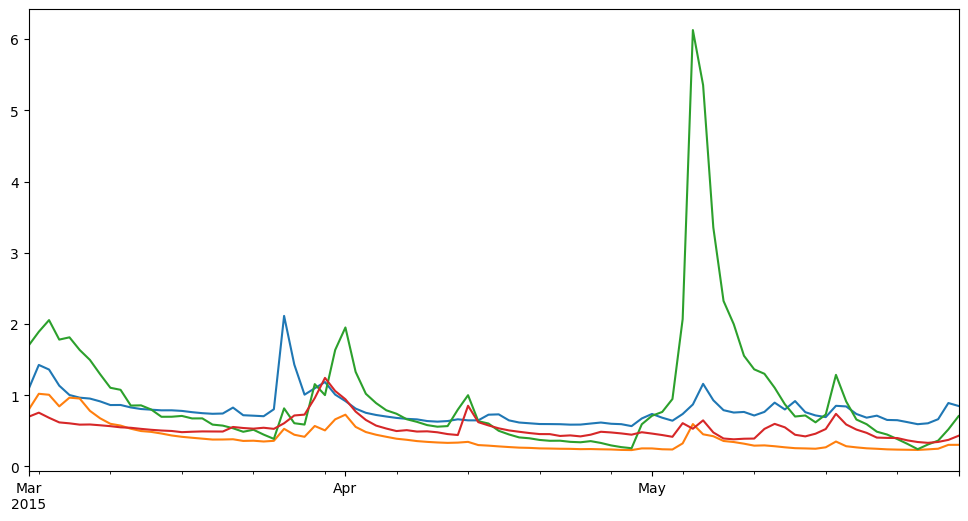

In [8]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

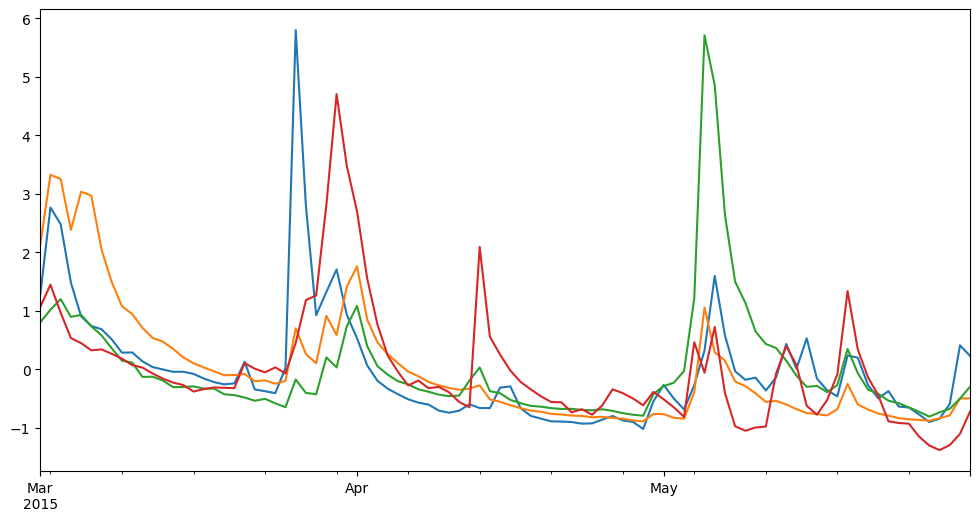

In [9]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

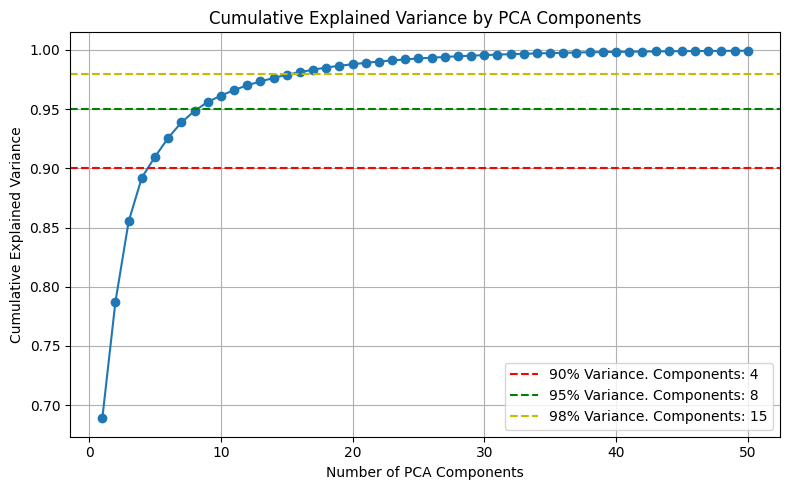

In [10]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [11]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[ 21.97161463,   4.86977257,  -4.11720471, ...,  -0.04167223,
         -0.74068194,  -1.67692675],
       [ 30.32299036,  10.7245075 ,  -4.84755771, ...,   0.79659659,
         -0.07376789,   0.92408281],
       [ 31.75102128,   6.86160194,  -5.89399853, ...,  -0.63528838,
          0.68794504,   0.90776704],
       ...,
       [-15.76975008,   0.83374824,   2.09110851, ...,   0.23743787,
          0.90212151,   0.10125278],
       [ -8.73420222,   9.64897604,   3.55658123, ...,   0.9531584 ,
         -0.04424631,  -0.55545963],
       [ -9.97554351,   6.66980282,   3.25639272, ...,  -0.75300835,
          0.73527616,  -0.07019014]], shape=(92, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_35384\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


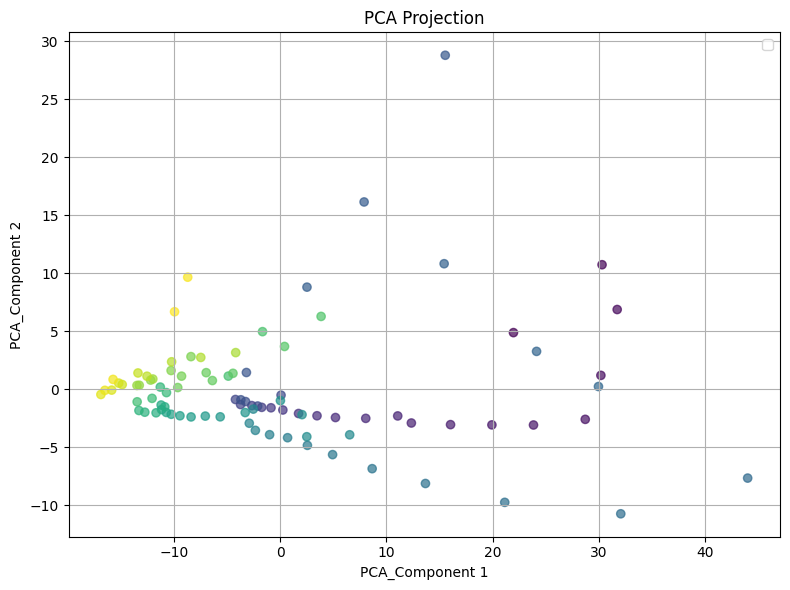

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_35384\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


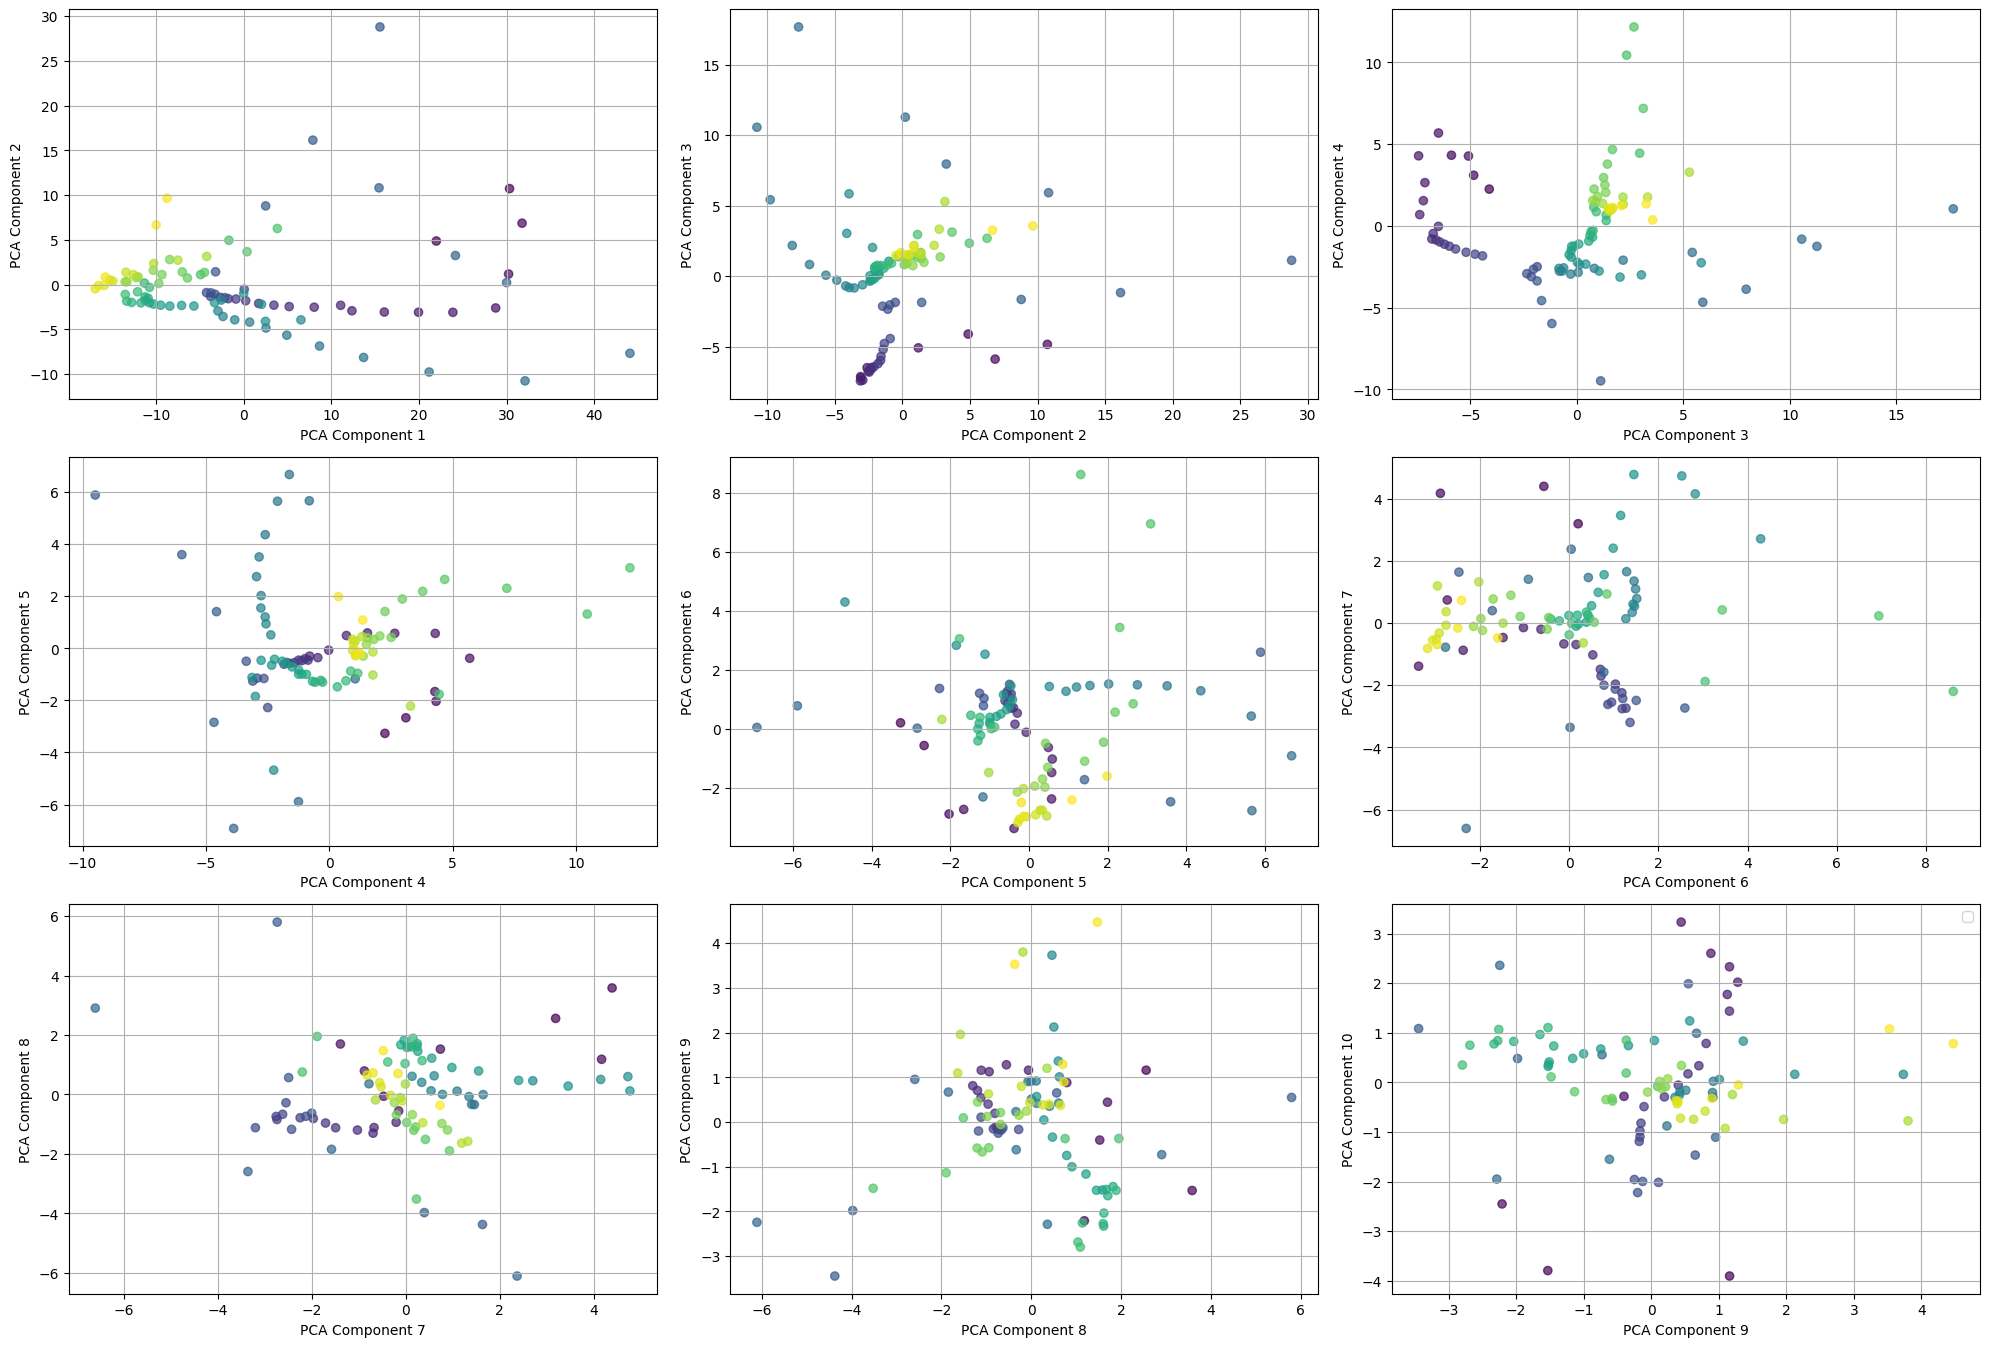

In [13]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [14]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.329
KMeans Davies-Bouldin Index is 1.273


<Axes: xlabel='k'>

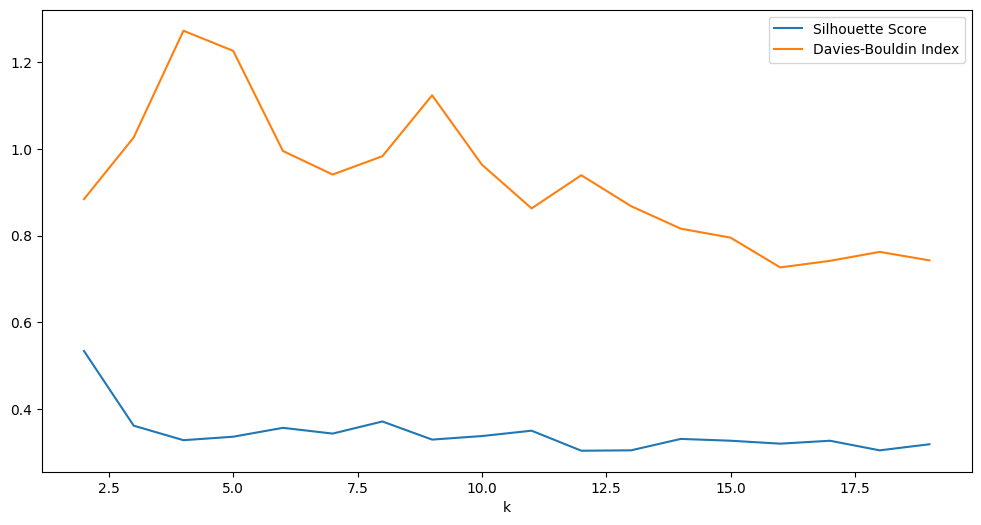

In [15]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         0     92               NaN   
1    0.76            3         0     92               NaN   
2    1.01            3         1     88               NaN   
3    1.27            3         2     78         -0.077913   
4    1.52            3         3     72         -0.150033   
5    1.78            3         5     63         -0.117717   
6    2.03            3         6     53         -0.061618   
7    2.29            3         7     49         -0.040291   
8    2.54            3         5     47          0.047159   
9    2.80            3         5     43          0.072470   
10   3.05            3         6     36          0.108606   
11   3.31            3         7     33          0.134860   
12   3.56            3         6     31          0.149962   
13   3.82            3         5     28          0.154431   
14   4.07            3         5     27          0.144174   
15   4.33            3         4     26          0.130590   
16   4.58            3         4     25          0.119330   
17   4.84            3         4     24          0.105890   
18   5.09            3         2     23          0.226158   
19   5.35            3         2     23          0.226158   
20   5.60            3         2     23          0.226158   
21   5.86            3         1     23               NaN   
22   6.11            3         1     21               NaN   
23   6.37            3         1     21               NaN   
24   6.62            3         1     21               NaN   
25   6.88            3         1     20               NaN   
26   7.13            3         1     18               NaN   
27   7.39            3         1     17               NaN   
28   7.64            3         1     14               NaN   
29   7.90            3         1     14               NaN   
30   8.15            3         1     12               NaN   
31   8.41            3         1     12               NaN   
32   8.66            3         1     12               NaN   
33   8.92            3         1     12               NaN   
34   9.17            3         1     11               NaN   
35   9.43            3         1     11               NaN   
36   9.68            3         1     11               NaN   
37   9.94            3         1     11               NaN   
38  10.19            3         1     11               NaN   
39  10.45            3         1     10               NaN   
40  10.70            3         1      9               NaN   
41  10.96            3         1      9               NaN   
42  11.21            3         1      9               NaN   
43  11.47            3         1      9               NaN   
44  11.72            3         1      8               NaN   
45  11.98            3         1      8               NaN   
46  12.23            3         1      8               NaN   
47  12.49            3         1      8               NaN   
48  12.74            3         1      8               NaN   
49  13.00            3         1      6               NaN   

    Davies-Bouldin Index  
0                    NaN  
1                    NaN  
2                    NaN  
3               1.025028  
4               1.481968  
5               1.472949  
6               1.312695  
7               1.333664  
8               1.428047  
9               1.379239  
10              1.295882  
11              1.294587  
12              1.327711  
13              1.399364  
14              1.448149  
15              1.526535  
16              1.593893  
17              1.676878  
18              1.676785  
19              1.676785  
20              1.676785  
21                   NaN  
22                   NaN  
23                   NaN  
24                   NaN  
25                   NaN  
26                   NaN  
27                   NaN  
28                   NaN  
29                   NaN  
30                   NaN  
31                   NaN  
32 

<Axes: xlabel='eps'>

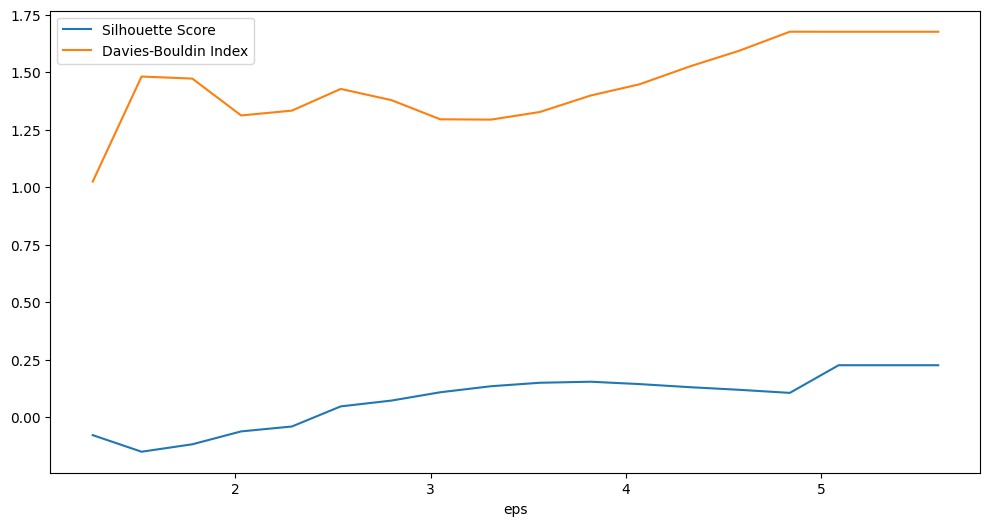

In [16]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

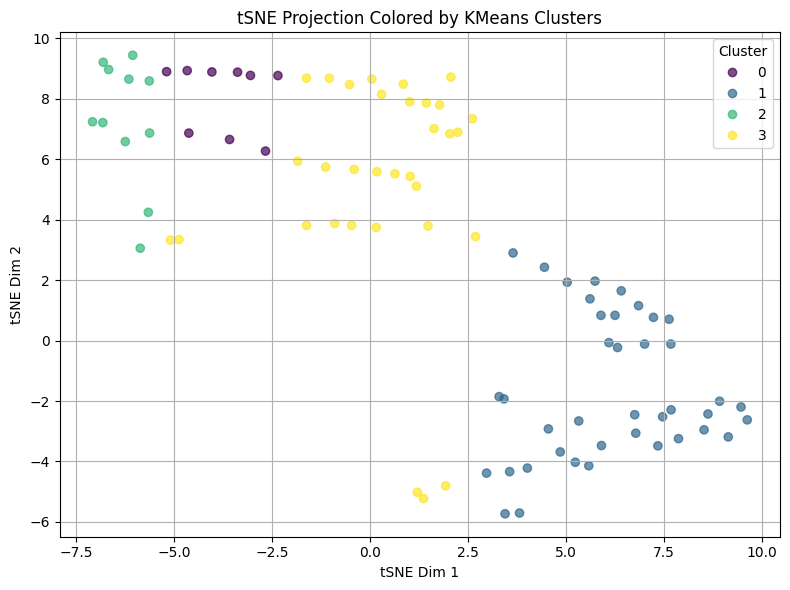

In [17]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.05            2         6    255          0.997258   
1    0.05            2         6    255          0.997258   
2    0.06            2         6    255          0.997258   
3    0.06            2         6    255          0.997258   
4    0.07            2         6    255          0.997258   
..    ...          ...       ...    ...               ...   
195  0.98            2        37    164          0.515719   
196  0.99            2        36    164          0.516080   
197  0.99            2        36    163          0.509858   
198  1.00            2        36    162          0.503751   
199  1.00            2        35    161          0.486850   

     Davies-Bouldin Index  
0                0.005119  
1                0.005119  
2                0.005119  
3                0.005119  
4                0.005119  
..                    ...  
195              0.550827  
196              0.555136  
197              0.559627  
198              0.574914  
199              0.598683  

[200 rows x 6 columns]

<Axes: xlabel='eps'>

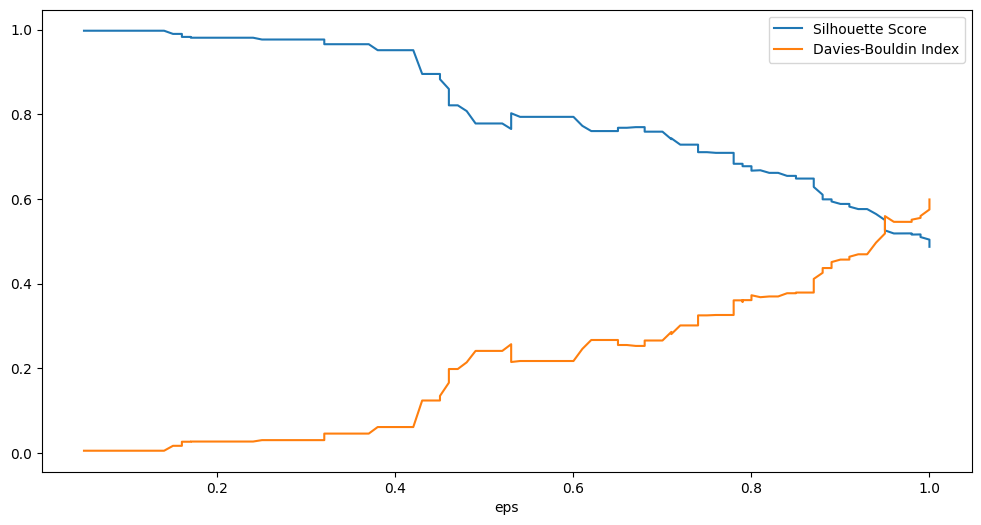

In [18]:
#For dbscan spatial plotting

data = season_df.T.copy()
data_scaled = (data - data.mean()) / data.std(ddof=0)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_scaled)

obs_ids = data.index

eps_values = np.linspace(0.05, 1.0, 200)
min_samples = 2

dbscan_results = []

#addtions
dbscan_lavels = None
best_eps = None
best_silhouette = -999

#x = pca_result.values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(pca_result[mask], labels[mask])
        db_index = davies_bouldin_score(pca_result[mask], labels[mask])
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

    if silhouette is not None and silhouette > best_silhouette:
        best_silhouette = silhouette
        best_labels = labels.copy()
        best_eps = eps

#saving for dbscan for spatial plotting
dbscan_eval_df = pd.DataFrame(dbscan_results)
dbscan_eval_df.to_csv(out_path / f"DBSCAN_Scores_season{str(season)}_seasonYear_{str(season_year)}.csv", index=False)

# print(f"eps={eps:.2f}, clusters={n_clusters}, noise={n_noise}")
# print("obs_ids length:", len(obs_ids))
# print("best_labels length:", len(best_labels))
# print("pca_result rows:", pca_result.shape[0])
# print("data_scaled rows:", data_scaled.shape[0])
# print("season_df.T rows:", season_df.T.shape[0])

# print("NaNs in data:", data.isna().sum().sum())
# print("NaNs in data_scaled:", data_scaled.isna().sum().sum())

#Use this file here 
dbscan_labels_df = pd.DataFrame({
    "obsstednr": obs_ids, #pca_result.index.to_list(), 
    "Cluster":best_labels,
    "eps_used": best_eps,
    "min_samples": min_samples})
dbscan_labels_df.to_csv(out_path / f"DBSCAN_Cluster_labels_season_{str(season)}_seasonYear{str(season_year)}.csv", index=False)
# from pathlib import Path



display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

#### Summer (2)

In [19]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

In [20]:
#Start with spring and work our way down to winter
season = 2
season_year = 2015
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids]
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2015-06-01 to 2015-08-31
Columns: 265 entries, 10000009 to 9001110
dtypes: float64(265)
memory usage: 191.2 KB


None

            10000009  10000010  10000011  10000014  10000016  10000017  \
2015-06-01  1.155809  0.880592  0.374098  1.063700  0.599507  0.590172   
2015-06-02  1.167404  0.964872  0.402907  1.047644  0.668384  0.657976   
2015-06-03  1.506495  1.353553  0.505617  1.303541  0.774854  0.762789   
2015-06-04  1.353612  0.907314  0.339703  1.052308  0.560236  0.551512   
2015-06-05  1.018583  0.724387  0.298153  0.921590  0.512300  0.504323   
...              ...       ...       ...       ...       ...       ...   
2015-08-27  1.158880  0.780677  0.440954  1.154410  0.577763  0.568767   
2015-08-28  1.119408  0.784464  0.426739  1.162174  0.557664  0.548980   
2015-08-29  1.051079  0.746138  0.407158  1.112478  0.527092  0.518884   
2015-08-30  0.996144  0.728818  0.409543  1.099078  0.518253  0.510183   
2015-08-31  0.976557  0.728042  0.412603  1.111043  0.523713  0.515558   

            11000011  11000016  12000001  12000195  ...  64000025  66000014  \
2015-06-01  0.936908  1.185336  

          2015-06-01  2015-06-02  2015-06-03  2015-06-04  2015-06-05  \
10000009    0.221240    0.199659    0.193116    0.293263    0.299965   
10000010   -0.018501    0.027908    0.111281   -0.001409   -0.035441   
10000011   -0.459707   -0.448650   -0.342422   -0.376178   -0.521378   
10000014    0.141004    0.098100    0.084521    0.094325    0.189386   
10000016   -0.263353   -0.223520   -0.198362   -0.230570   -0.277234   
...              ...         ...         ...         ...         ...   
7000003    -0.090651   -0.098973   -0.033054   -0.027815   -0.095750   
8000001     0.115807    0.101367    0.087067    0.126663    0.180755   
9000001     0.676633    0.827376    0.472020    0.678754    1.017292   
9000015     0.623341    0.758843    0.423267    0.623705    0.950557   
9001110    -0.212533   -0.085571   -0.112588   -0.043373   -0.165253   

          2015-06-06  2015-06-07  2015-06-08  2015-06-09  2015-06-10  ...  \
10000009    0.335669    0.366674    0.375824    0.378028  

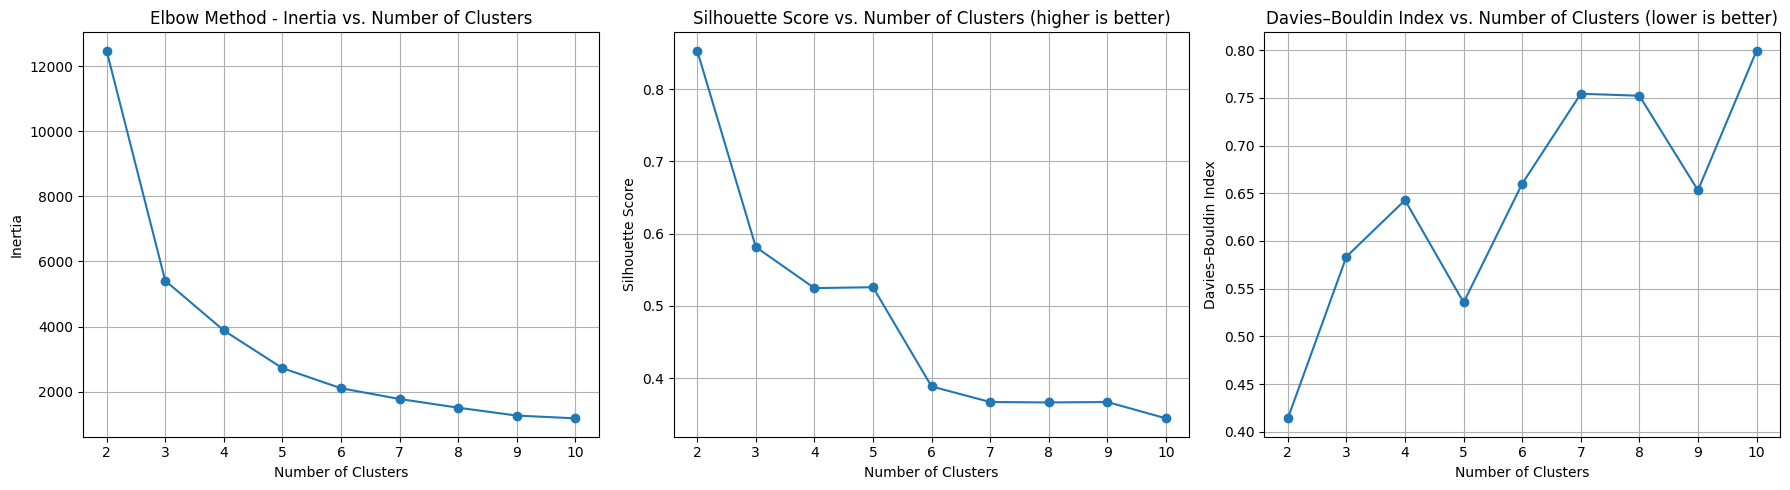

In [21]:
# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        1
10000010        0
10000011        0
10000014        1
10000016        0

            10000009  10000010  10000011  10000014  10000016  10000017  \
2015-06-01  1.155809  0.880592  0.374098  1.063700  0.599507  0.590172   
2015-06-02  1.167404  0.964872  0.402907  1.047644  0.668384  0.657976   
2015-06-03  1.506495  1.353553  0.505617  1.303541  0.774854  0.762789   
2015-06-04  1.353612  0.907314  0.339703  1.052308  0.560236  0.551512   
2015-06-05  1.018583  0.724387  0.298153  0.921590  0.512300  0.504323   
...              ...       ...       ...       ...       ...       ...   
2015-08-27  1.158880  0.780677  0.440954  1.154410  0.577763  0.568767   
2015-08-28  1.119408  0.784464  0.426739  1.162174  0.557664  0.548980   
2015-08-29  1.051079  0.746138  0.407158  1.112478  0.527092  0.518884   
2015-08-30  0.996144  0.728818  0.409543  1.099078  0.518253  0.510183   
2015-08-31  0.976557  0.728042  0.412603  1.111043  0.523713  0.515558   

            11000011  11000016  12000001  12000195  ...  64000025  66000014  \
2015-06-01  0.936908  1.185336  

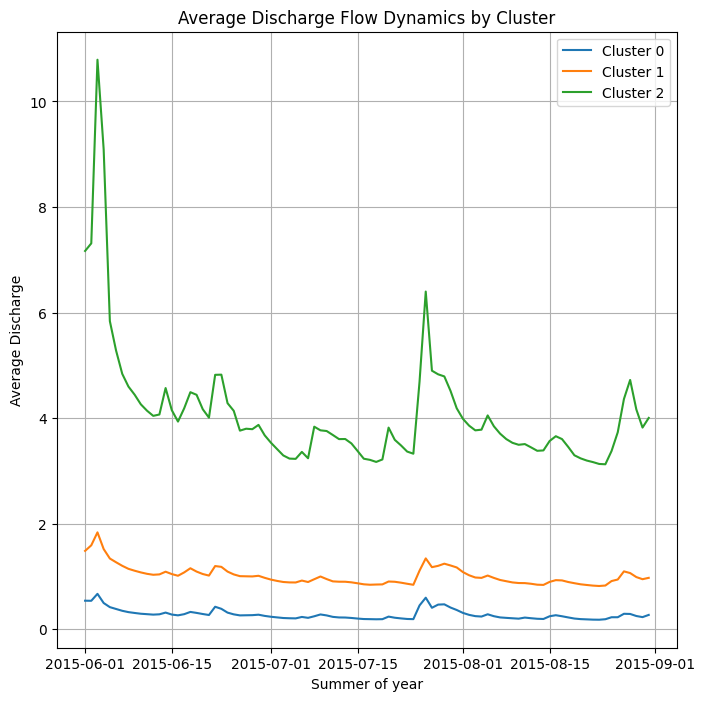

In [22]:
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure(figsize=(8, 8))
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Summer of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)

In [24]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009  10000010  10000011  10000014  10000016  10000017  \
2015-06-01  1.155809  0.880592  0.374098  1.063700  0.599507  0.590172   
2015-06-02  1.167404  0.964872  0.402907  1.047644  0.668384  0.657976   
2015-06-03  1.506495  1.353553  0.505617  1.303541  0.774854  0.762789   
2015-06-04  1.353612  0.907314  0.339703  1.052308  0.560236  0.551512   
2015-06-05  1.018583  0.724387  0.298153  0.921590  0.512300  0.504323   
...              ...       ...       ...       ...       ...       ...   
2015-08-27  1.158880  0.780677  0.440954  1.154410  0.577763  0.568767   
2015-08-28  1.119408  0.784464  0.426739  1.162174  0.557664  0.548980   
2015-08-29  1.051079  0.746138  0.407158  1.112478  0.527092  0.518884   
2015-08-30  0.996144  0.728818  0.409543  1.099078  0.518253  0.510183   
2015-08-31  0.976557  0.728042  0.412603  1.111043  0.523713  0.515558   

            11000011  11000016  12000001  12000195  ...  64000025  66000014  \
2015-06-01  0.936908  1.185336  0.660320  0.787665  ...  0.077116  0.161532   
2015-06-02  0.999873  1.454589  0.667206  0.768529  ...  0.075877  0.151702   
2015-06-03  1.085867  1.598527  0.660322  0.761508  ...  0.078224  0.146556   
2015-06-04  1.127647  1.275632  0.571781  0.716962  ...  0.073697  0.128716   
2015-06-05  1.123353  1.063195  0.549221  0.613127  ...  0.069929  0.123171   
...              ...       ...       ...       ...  ...       ...       ...   
2015-08-27  0.689987  0.883400  0.841938  0.677186  ...  0.005300  0.039336   
2015-08-28  0.704218  0.867068  0.432078  0.735985  ...  0.012738  0.068211   
2015-08-29  0.722997  0.783683  0.338001  0.747618  ...  0.010585  0.052391   
2015-08-30  0.725930  0.742651  0.321771  0.677611  ...  0.006331  0.044600   
2015-08-31  0.721024  0.728279  0.326943  0.585838  ...  0.004689  0.051297   

            67000017  67000018  67000019   7000003   8000001   9000001  \
2015-06-01  0.114039  0.142112  0.155428  0.797765  1.034774  1.678588   
2015-06-02  0.107763  0.131772  0.145399  0.815252  1.051496  1.907619   
2015-06-03  0.102925  0.123898  0.123942  1.083802  1.308299  2.027746   
2015-06-04  0.087072  0.102516  0.103327  0.867319  1.101286  1.937461   
2015-06-05  0.075722  0.091037  0.091825  0.671487  0.914020  1.647779   
...              ...       ...       ...       ...       ...       ...   
2015-08-27  0.018482  0.009378  0.016215  0.537982  0.776410  1.027461   
2015-08-28  0.029557  0.040876  0.038349  0.692906  0.753721  1.081781   
2015-08-29  0.017775  0.022998  0.024594  0.602042  0.697107  1.071636   
2015-08-30  0.017156  0.018308  0.019713  0.548251  0.656107  1.047421   
2015-08-31  0.017305  0.022841  0.017616  0.527868  0.638059  1.010050   

             9000015   9001110  
2015-06-01  1.617411  0.657848  
2015-06-02  1.826803  0.831056  
2015-06-03  1.936630  0.935160  
2015-06-04  1.854086  0.843756  
2015-06-05  1.589243  0.610523  
...              ...       ...  
2015-08-27  1.022115  0.187357  
2015-08-28  1.071777  0.265532  
2015-08-29  1.062502  0.237078  
2015-08-30  1.040364  0.199906  
2015-08-31  1.006198  0.159516  

[92 rows x 265 columns]

<Axes: >

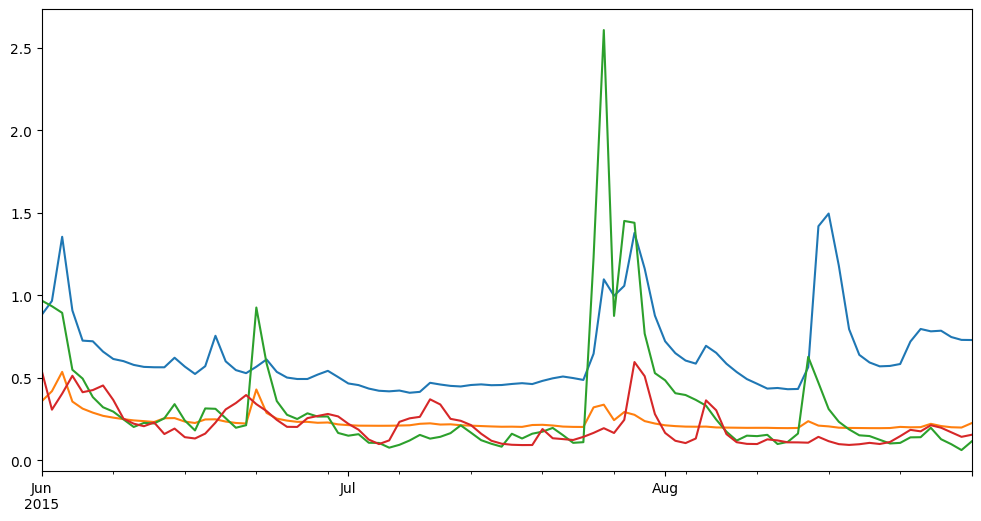

In [25]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

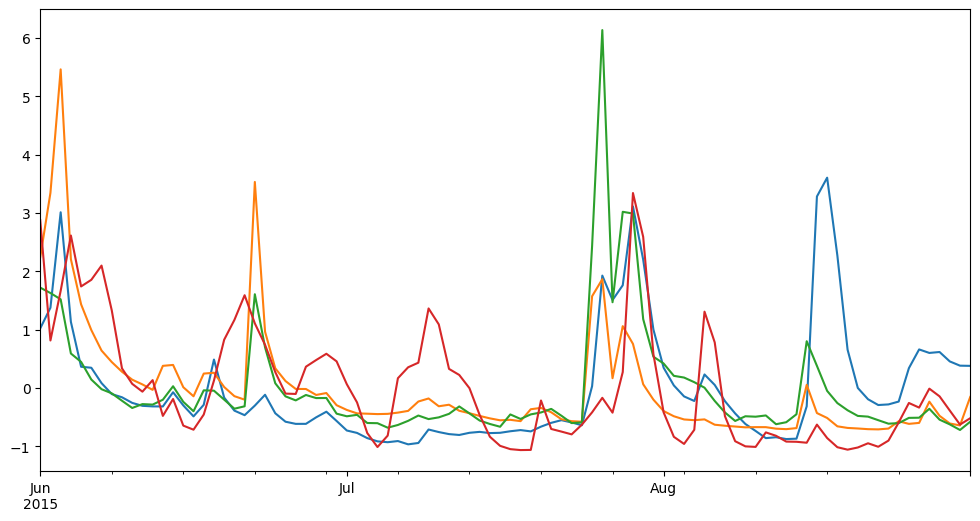

In [26]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

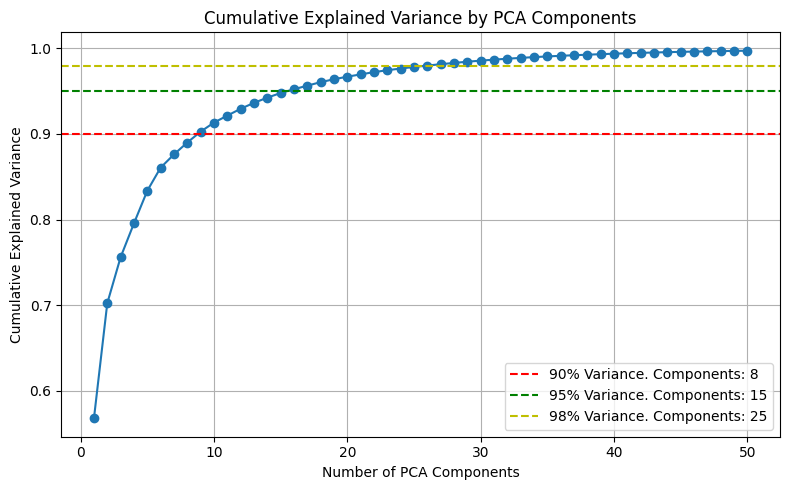

In [27]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [28]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[ 3.58429921e+01, -2.46591101e+00,  1.84069264e+00, ...,
        -9.75917373e-01, -9.49654855e-01,  4.96431254e-01],
       [ 3.71738967e+01, -2.79087452e+00,  2.61961982e+00, ...,
        -1.48182325e+00, -2.34274544e-01, -1.96840463e+00],
       [ 5.23924221e+01,  1.81108235e+00,  3.56695907e+00, ...,
         1.28784950e+00,  2.33412288e+00,  8.12257884e-01],
       ...,
       [-4.23182080e+00,  2.90138043e+00,  3.43345524e+00, ...,
        -1.38281950e-01,  4.35103920e-01,  1.03074131e+00],
       [-6.96013642e+00,  2.21661598e+00,  4.09900964e+00, ...,
         4.68404213e-02,  5.44196493e-02,  1.93922653e+00],
       [-4.05233926e+00,  4.45713833e+00,  3.11494224e+00, ...,
         5.99738269e-01,  1.34915727e+00,  1.75881519e+00]],
      shape=(92, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_35384\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


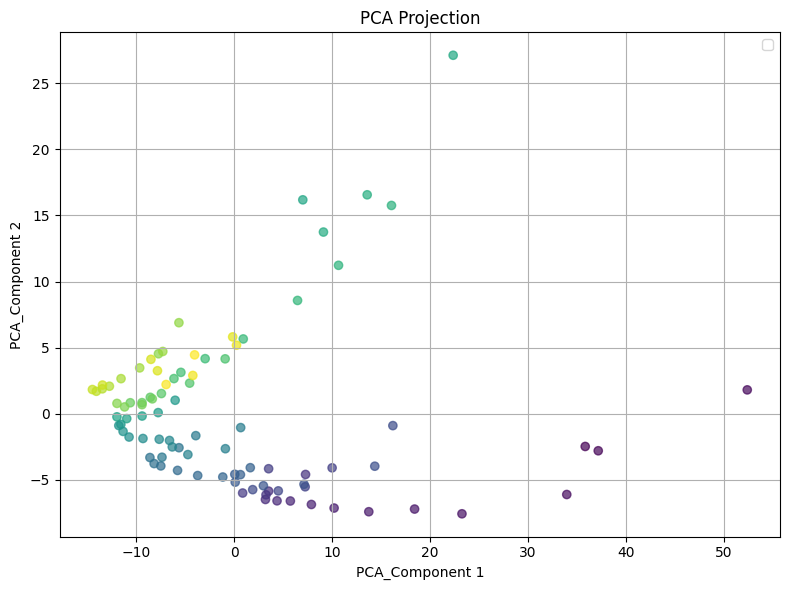

In [29]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_35384\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


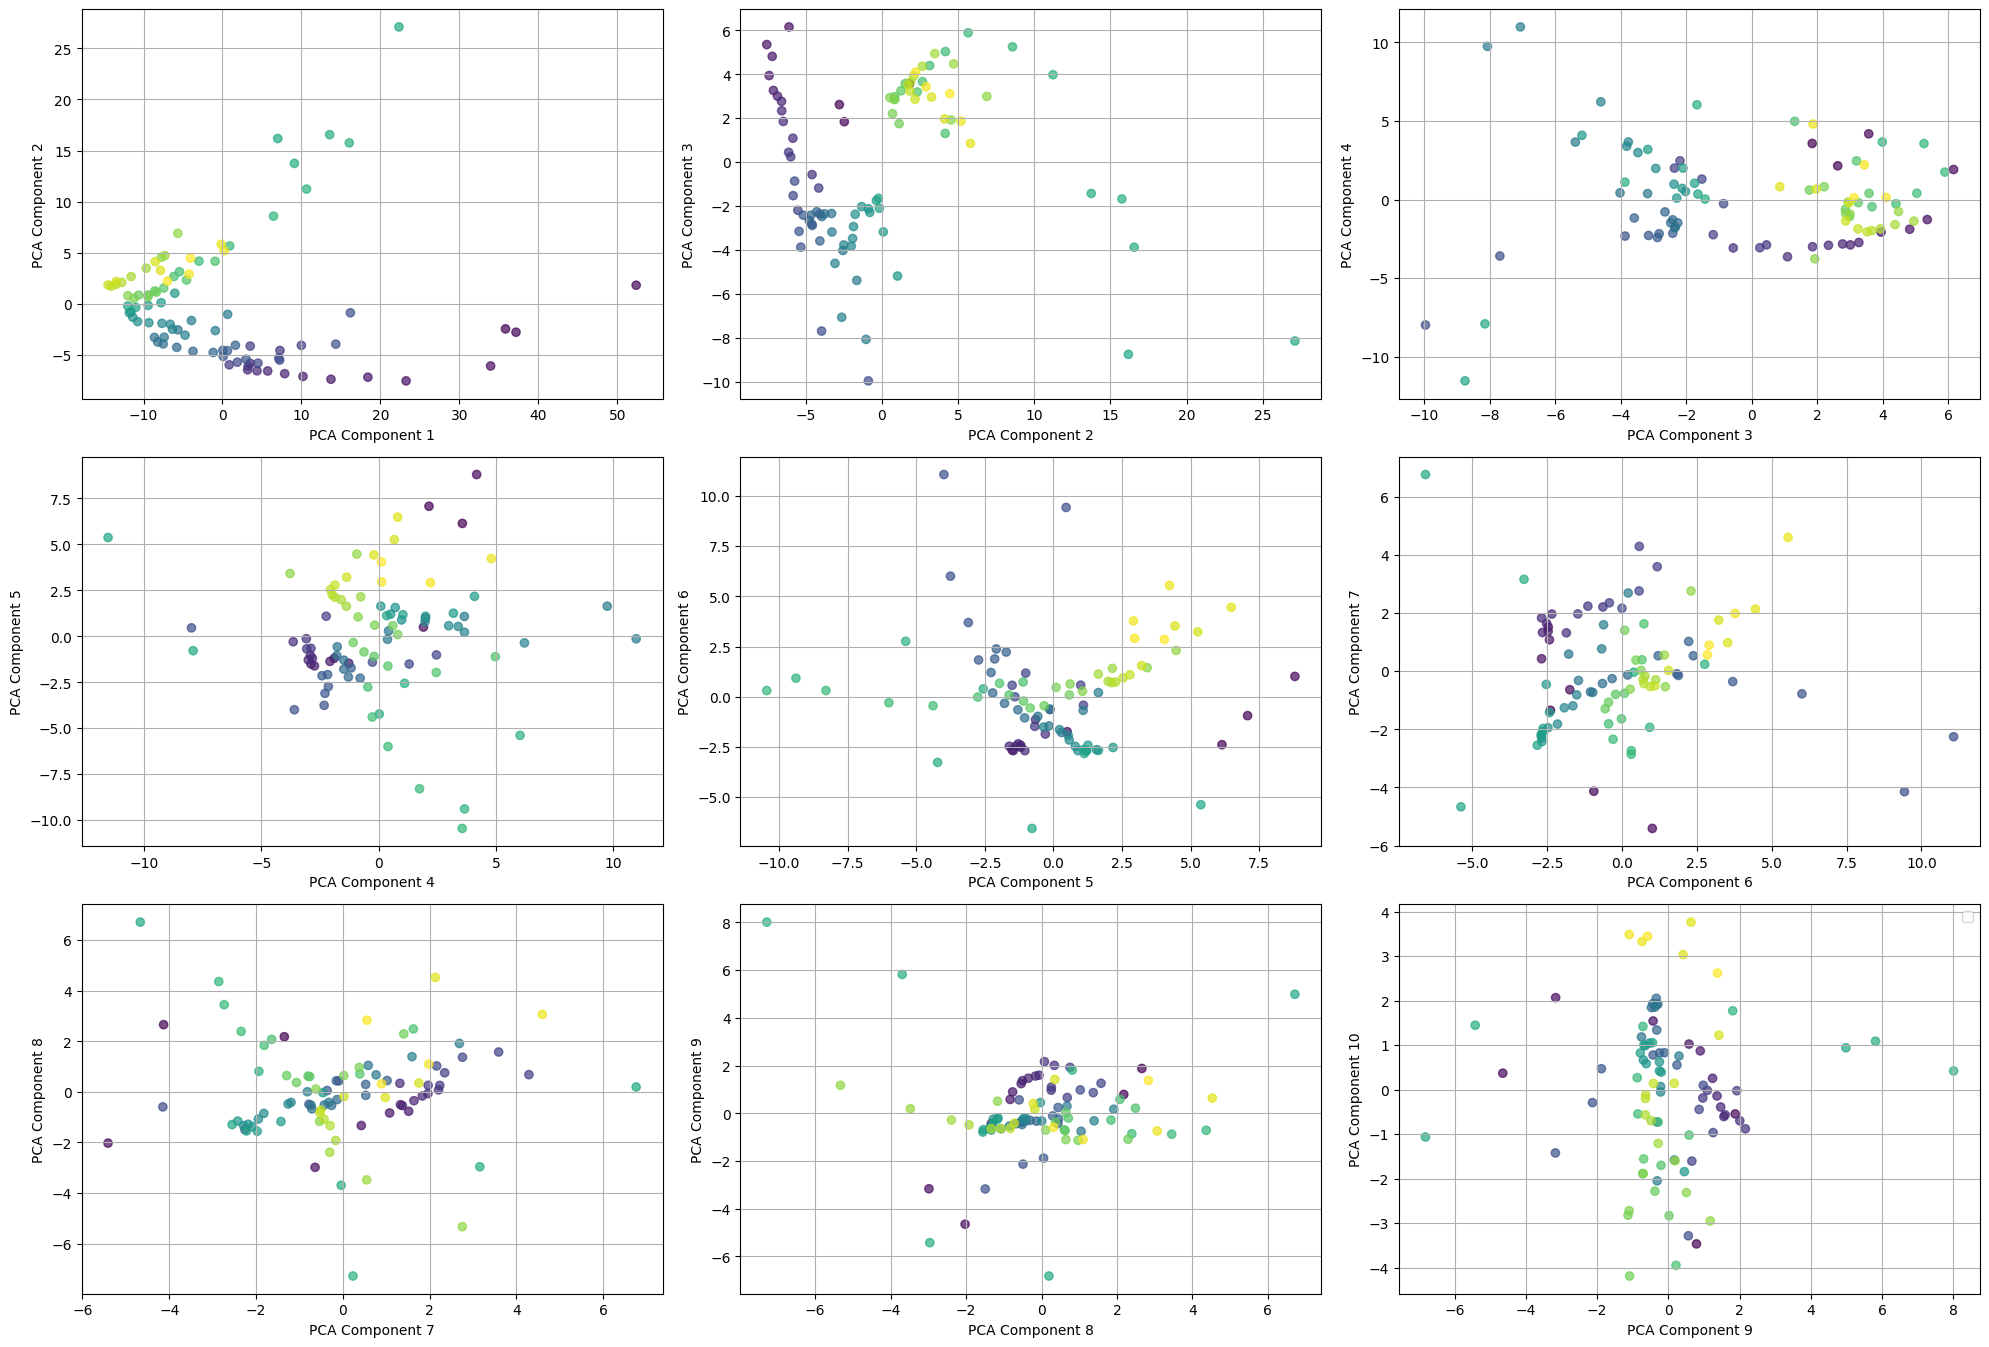

In [30]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [31]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.468
KMeans Davies-Bouldin Index is 1.186


<Axes: xlabel='k'>

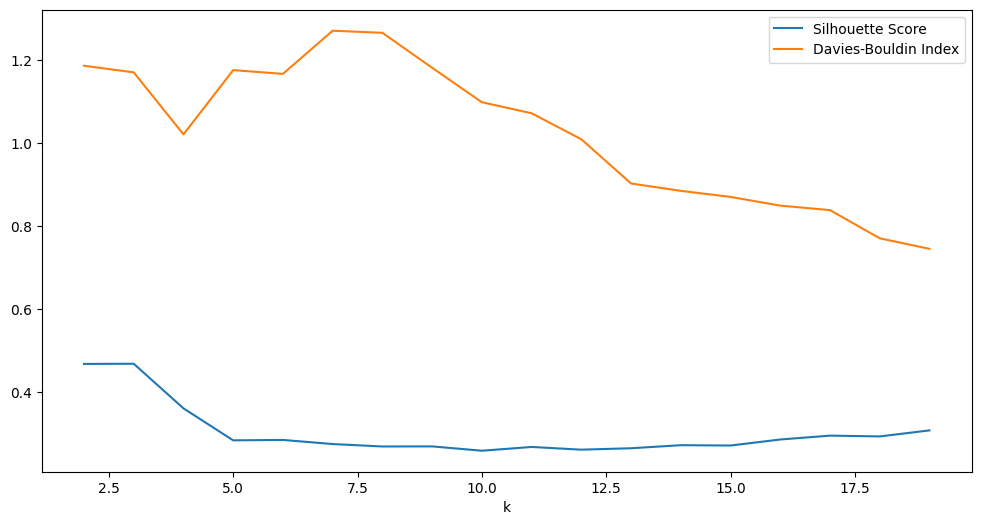

In [32]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         0     92               NaN   
1    0.76            3         0     92               NaN   
2    1.01            3         1     89               NaN   
3    1.27            3         2     85         -0.198052   
4    1.52            3         2     85         -0.198052   
5    1.78            3         3     82         -0.178663   
6    2.03            3         5     70         -0.162428   
7    2.29            3         6     64         -0.103297   
8    2.54            3         5     60         -0.063659   
9    2.80            3         5     57         -0.034897   
10   3.05            3         5     55         -0.014023   
11   3.31            3         5     50          0.007569   
12   3.56            3         6     47          0.009509   
13   3.82            3         7     43          0.029936   
14   4.07            3         6     38          0.066879   
15   4.33            3         6     37          0.072967   
16   4.58            3         5     35          0.085227   
17   4.84            3         5     34          0.087116   
18   5.09            3         5     28          0.142746   
19   5.35            3         5     25          0.157429   
20   5.60            3         5     24          0.154651   
21   5.86            3         5     22          0.151873   
22   6.11            3         4     21          0.152975   
23   6.37            3         3     21          0.076040   
24   6.62            3         3     21          0.076040   
25   6.88            3         3     20          0.082486   
26   7.13            3         2     20          0.159449   
27   7.39            3         2     20          0.159449   
28   7.64            3         2     20          0.159449   
29   7.90            3         1     16               NaN   
30   8.15            3         1     14               NaN   
31   8.41            3         1     14               NaN   
32   8.66            3         1     14               NaN   
33   8.92            3         1     13               NaN   
34   9.17            3         1     12               NaN   
35   9.43            3         1     12               NaN   
36   9.68            3         1     12               NaN   
37   9.94            3         1     11               NaN   
38  10.19            3         1     11               NaN   
39  10.45            3         1     11               NaN   
40  10.70            3         1     11               NaN   
41  10.96            3         1     11               NaN   
42  11.21            3         1     11               NaN   
43  11.47            3         1     10               NaN   
44  11.72            3         1     10               NaN   
45  11.98            3         1     10               NaN   
46  12.23            3         1     10               NaN   
47  12.49            3         1      9               NaN   
48  12.74            3         1      8               NaN   
49  13.00            3         1      8               NaN   

    Davies-Bouldin Index  
0                    NaN  
1                    NaN  
2                    NaN  
3               1.223029  
4               1.223029  
5               1.162529  
6               1.558478  
7               1.524315  
8               1.604631  
9               1.623061  
10              1.629150  
11              1.567011  
12              1.646777  
13              1.641548  
14              1.638179  
15              1.617579  
16              1.670230  
17              1.666080  
18              1.555866  
19              1.527311  
20              1.523386  
21              1.551561  
22              1.521237  
23              1.575643  
24              1.575643  
25              1.540835  
26              1.637304  
27              1.637304  
28              1.637304  
29                   NaN  
30                   NaN  
31                   NaN  
32 

<Axes: xlabel='eps'>

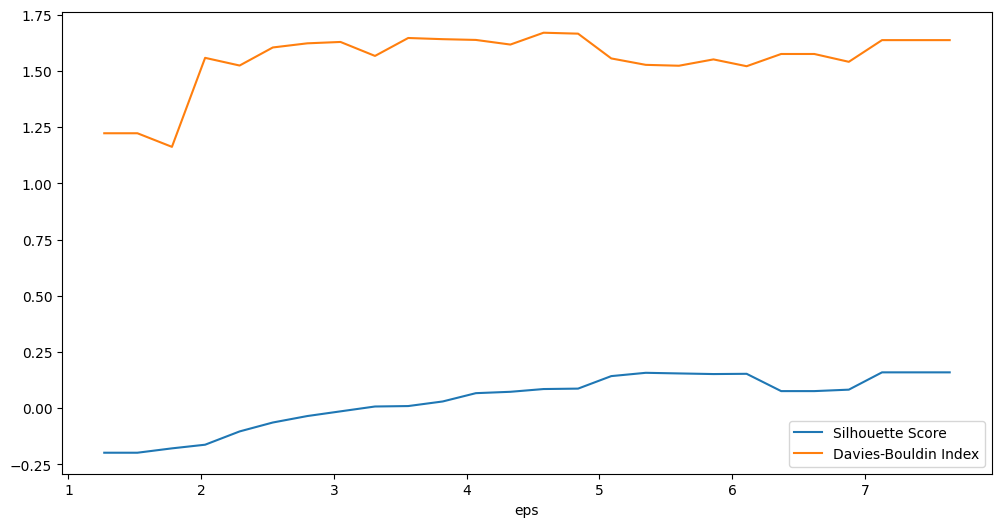

In [33]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

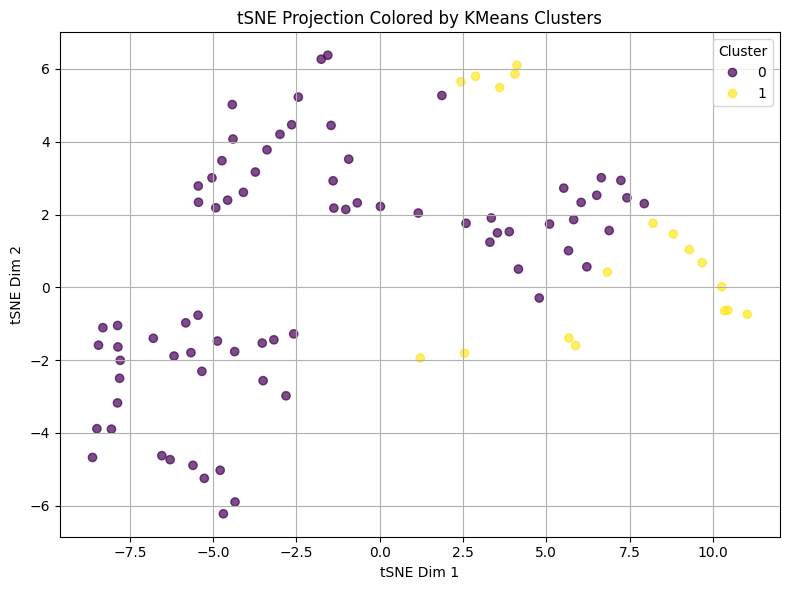

In [34]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.05            2         8    249          0.974960   
1    0.05            2         8    249          0.974960   
2    0.06            2         8    249          0.974960   
3    0.06            2         9    247          0.974796   
4    0.07            2         9    247          0.974796   
..    ...          ...       ...    ...               ...   
195  0.98            2        16     76          0.126599   
196  0.99            2        16     75          0.123442   
197  0.99            2        16     75          0.123442   
198  1.00            2        16     74          0.124201   
199  1.00            2        16     74          0.124201   

     Davies-Bouldin Index  
0                0.026934  
1                0.026934  
2                0.026934  
3                0.027797  
4                0.027797  
..                    ...  
195              0.648557  
196              0.648564  
197              0.648564  
198              0.670413  
199              0.670413  

[200 rows x 6 columns]

<Axes: xlabel='eps'>

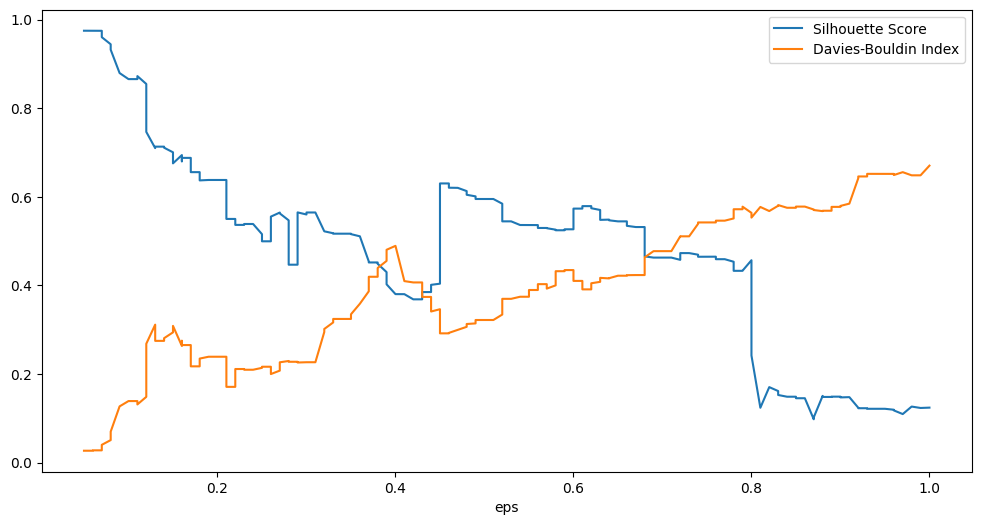

In [35]:
#For dbscan spatial plotting

data = season_df.T.copy()
data_scaled = (data - data.mean()) / data.std(ddof=0)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_scaled)

obs_ids = data.index

eps_values = np.linspace(0.05, 1.0, 200)
min_samples = 2

dbscan_results = []

#addtions
dbscan_lavels = None
best_eps = None
best_silhouette = -999

#x = pca_result.values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(pca_result[mask], labels[mask])
        db_index = davies_bouldin_score(pca_result[mask], labels[mask])
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

    if silhouette is not None and silhouette > best_silhouette:
        best_silhouette = silhouette
        best_labels = labels.copy()
        best_eps = eps

#saving for dbscan for spatial plotting
dbscan_eval_df = pd.DataFrame(dbscan_results)
dbscan_eval_df.to_csv(out_path / f"DBSCAN_Scores_season{str(season)}_seasonYear_{str(season_year)}.csv", index=False)

# print(f"eps={eps:.2f}, clusters={n_clusters}, noise={n_noise}")
# print("obs_ids length:", len(obs_ids))
# print("best_labels length:", len(best_labels))
# print("pca_result rows:", pca_result.shape[0])
# print("data_scaled rows:", data_scaled.shape[0])
# print("season_df.T rows:", season_df.T.shape[0])

# print("NaNs in data:", data.isna().sum().sum())
# print("NaNs in data_scaled:", data_scaled.isna().sum().sum())

#Use this file here 
dbscan_labels_df = pd.DataFrame({
    "obsstednr": obs_ids, #pca_result.index.to_list(), 
    "Cluster":best_labels,
    "eps_used": best_eps,
    "min_samples": min_samples})
dbscan_labels_df.to_csv(out_path / f"DBSCAN_Cluster_labels_season_{str(season)}_seasonYear{str(season_year)}.csv", index=False)
# from pathlib import Path



display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

#### Fall (3)

In [36]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

In [37]:
#Start with spring and work our way down to winter
season = 3
season_year = 2015
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids]
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 91 entries, 2015-09-01 to 2015-11-30
Columns: 265 entries, 10000009 to 9001110
dtypes: float64(265)
memory usage: 189.1 KB


None

            10000009  10000010  10000011  10000014  10000016  10000017  \
2015-09-01  1.268984  1.000696  0.872758  1.119378  0.791250  0.778929   
2015-09-02  1.526303  1.201420  0.986368  1.091185  0.687816  0.677105   
2015-09-03  1.415335  1.181679  0.834010  1.039931  0.656803  0.646575   
2015-09-04  1.160175  1.106331  0.830412  0.967093  0.628044  0.618264   
2015-09-05  1.097292  1.128357  1.783744  0.929367  0.809986  0.797373   
...              ...       ...       ...       ...       ...       ...   
2015-11-26  1.470335  0.785829  0.596832  1.187291  0.535569  0.527229   
2015-11-27  1.343929  0.746904  0.568656  1.134137  0.550172  0.541605   
2015-11-28  1.441688  0.809651  0.622072  1.195461  0.631401  0.621569   
2015-11-29  1.862826  1.074552  1.346140  1.387244  0.962688  0.947697   
2015-11-30  2.648615  1.662384  3.830009  1.756176  1.385641  1.364064   

            11000011  11000016  12000001  12000195  ...  64000025  66000014  \
2015-09-01  0.784750  0.959355  

          2015-09-01  2015-09-02  2015-09-03  2015-09-04  2015-09-05  \
10000009    0.510173    1.224225    1.203595    0.482035   -0.074820   
10000010    0.182795    0.737630    0.838564    0.418410   -0.058360   
10000011    0.026678    0.415535    0.295416    0.092368    0.288887   
10000014    0.327616    0.572525    0.617117    0.253878   -0.163792   
10000016   -0.072782   -0.031621    0.018572   -0.146762   -0.227045   
...              ...         ...         ...         ...         ...   
7000003     0.099496    0.944980    0.982398    0.449785    0.143920   
8000001     0.186147    1.115414    0.997876    0.544624    0.074609   
9000001     0.267556    0.599800    0.858532    0.652377    0.030127   
9000015     0.256566    0.581271    0.827810    0.618007    0.015123   
9001110    -0.731845   -0.588714   -0.447780   -0.387439   -0.422376   

          2015-09-06  2015-09-07  2015-09-08  2015-09-09  2015-09-10  ...  \
10000009    0.160742    0.561635    0.464278    0.436419  

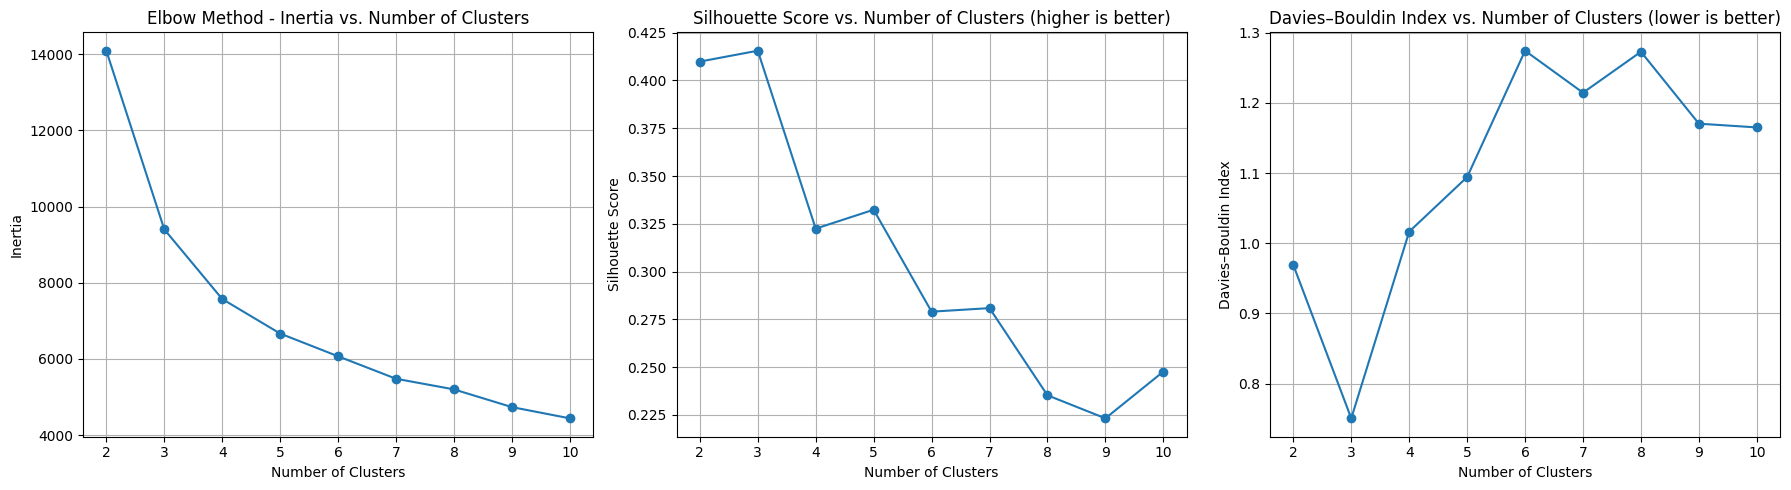

In [38]:
# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        0
10000010        1
10000011        1
10000014        0
10000016        1

            10000009  10000010  10000011  10000014  10000016  10000017  \
2015-09-01  1.268984  1.000696  0.872758  1.119378  0.791250  0.778929   
2015-09-02  1.526303  1.201420  0.986368  1.091185  0.687816  0.677105   
2015-09-03  1.415335  1.181679  0.834010  1.039931  0.656803  0.646575   
2015-09-04  1.160175  1.106331  0.830412  0.967093  0.628044  0.618264   
2015-09-05  1.097292  1.128357  1.783744  0.929367  0.809986  0.797373   
...              ...       ...       ...       ...       ...       ...   
2015-11-26  1.470335  0.785829  0.596832  1.187291  0.535569  0.527229   
2015-11-27  1.343929  0.746904  0.568656  1.134137  0.550172  0.541605   
2015-11-28  1.441688  0.809651  0.622072  1.195461  0.631401  0.621569   
2015-11-29  1.862826  1.074552  1.346140  1.387244  0.962688  0.947697   
2015-11-30  2.648615  1.662384  3.830009  1.756176  1.385641  1.364064   

            11000011  11000016  12000001  12000195  ...  64000025  66000014  \
2015-09-01  0.784750  0.959355  

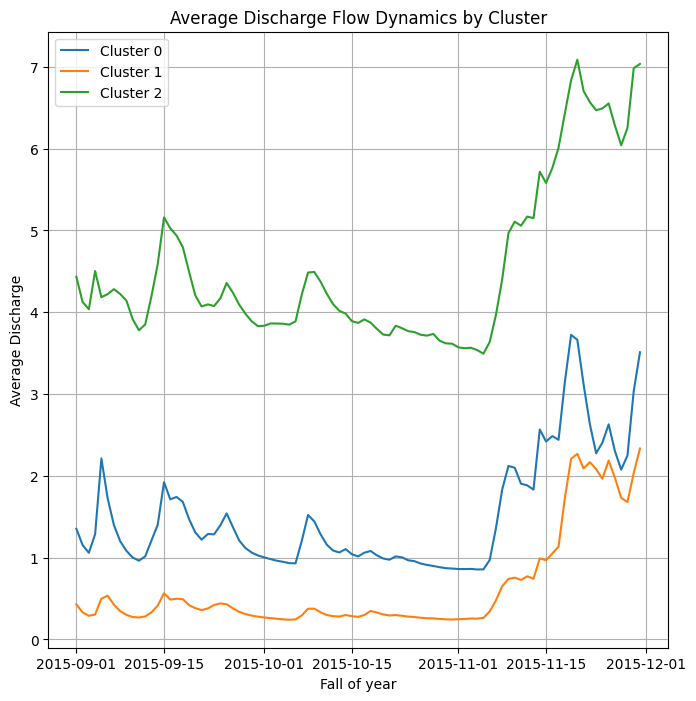

In [39]:
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure(figsize=(8, 8))
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Fall of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [40]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)

In [41]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009  10000010  10000011  10000014  10000016  10000017  \
2015-09-01  1.268984  1.000696  0.872758  1.119378  0.791250  0.778929   
2015-09-02  1.526303  1.201420  0.986368  1.091185  0.687816  0.677105   
2015-09-03  1.415335  1.181679  0.834010  1.039931  0.656803  0.646575   
2015-09-04  1.160175  1.106331  0.830412  0.967093  0.628044  0.618264   
2015-09-05  1.097292  1.128357  1.783744  0.929367  0.809986  0.797373   
...              ...       ...       ...       ...       ...       ...   
2015-11-26  1.470335  0.785829  0.596832  1.187291  0.535569  0.527229   
2015-11-27  1.343929  0.746904  0.568656  1.134137  0.550172  0.541605   
2015-11-28  1.441688  0.809651  0.622072  1.195461  0.631401  0.621569   
2015-11-29  1.862826  1.074552  1.346140  1.387244  0.962688  0.947697   
2015-11-30  2.648615  1.662384  3.830009  1.756176  1.385641  1.364064   

            11000011  11000016  12000001  12000195  ...  64000025  66000014  \
2015-09-01  0.784750  0.959355  0.989307  0.837783  ...  0.004214  0.050652   
2015-09-02  0.802513  1.037559  0.588648  0.921968  ...  0.004376  0.043541   
2015-09-03  0.869072  1.205484  0.475400  0.963720  ...  0.003745  0.039290   
2015-09-04  0.933439  1.222706  0.438503  0.988001  ...  0.002088  0.042872   
2015-09-05  0.978919  1.117860  0.421309  1.012731  ...  0.000514  0.049107   
...              ...       ...       ...       ...  ...       ...       ...   
2015-11-26  2.577466  3.474437  1.454759  1.823806  ...  1.276860  1.568342   
2015-11-27  2.603910  3.060578  1.285672  1.864294  ...  0.943567  1.403544   
2015-11-28  2.753627  3.843042  1.973962  2.233571  ...  0.929936  1.208862   
2015-11-29  2.978006  4.266488  3.221717  2.693370  ...  1.312496  1.589826   
2015-11-30  3.269268  4.638252  3.380853  3.142374  ...  2.436551  2.293637   

            67000017  67000018  67000019   7000003   8000001   9000001  \
2015-09-01  0.017438  0.018455  0.016460  0.932433  1.003443  1.070159   
2015-09-02  0.017694  0.015625  0.014868  1.339861  1.453654  1.109395   
2015-09-03  0.018360  0.011746  0.016033  1.273747  1.283655  1.194461   
2015-09-04  0.022630  0.019231  0.031302  1.132883  1.213142  1.304331   
2015-09-05  0.032384  0.061068  0.055999  1.510138  1.379321  1.295367   
...              ...       ...       ...       ...       ...       ...   
2015-11-26  1.696394  2.006245  2.552515  1.457937  1.750359  2.942576   
2015-11-27  1.545490  1.651913  2.276674  1.266219  1.568378  2.529621   
2015-11-28  1.335090  1.438234  2.075582  1.335005  1.613284  3.176161   
2015-11-29  1.707490  3.526582  2.234339  1.845781  1.871799  4.149076   
2015-11-30  2.459251  5.099125  2.433496  3.361280  3.184568  5.024785   

             9000015   9001110  
2015-09-01  1.061152  0.251145  
2015-09-02  1.097024  0.315863  
2015-09-03  1.174795  0.358291  
2015-09-04  1.275244  0.424367  
2015-09-05  1.267049  0.441323  
...              ...       ...  
2015-11-26  2.773017  1.550034  
2015-11-27  2.395472  1.323627  
2015-11-28  2.986572  1.893802  
2015-11-29  3.876064  2.795188  
2015-11-30  4.676684  3.838279  

[91 rows x 265 columns]

<Axes: >

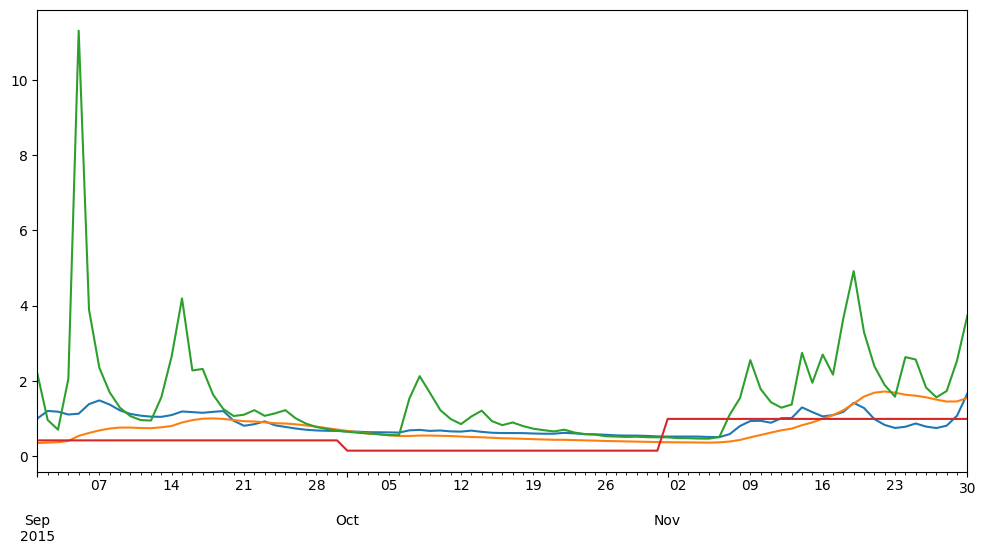

In [42]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

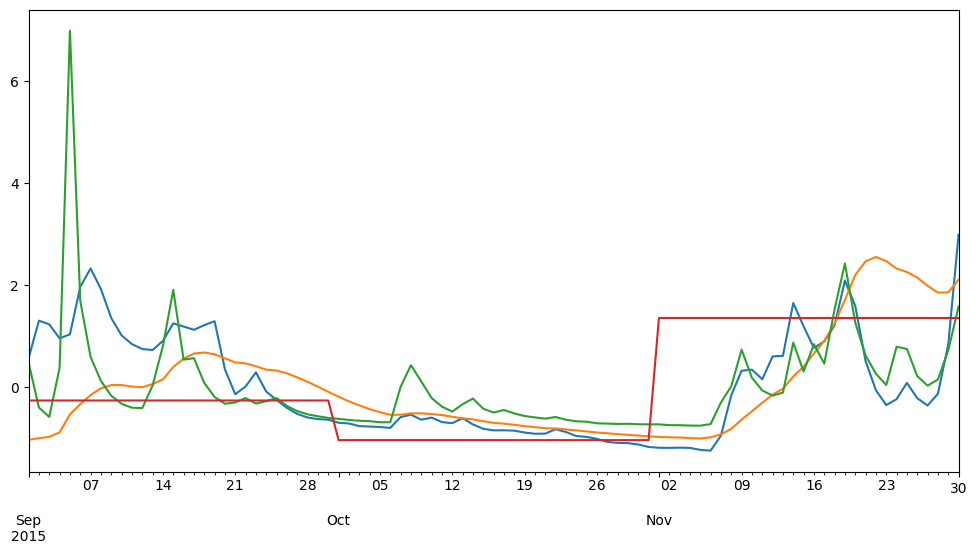

In [43]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

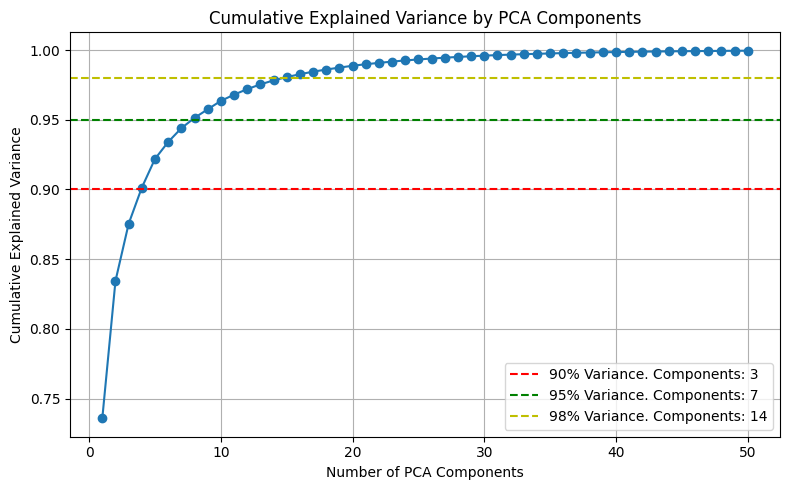

In [44]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [45]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[-4.58654004e+00,  3.48651568e+00,  2.24584423e+00, ...,
         6.54852098e-01, -9.35744492e-02, -1.77743094e-01],
       [-7.07349730e+00,  2.22324059e+00,  2.15707449e+00, ...,
         2.08939312e-01, -3.66731159e-04,  9.39790070e-01],
       [-8.65166548e+00,  9.31825069e-01,  1.78646964e+00, ...,
         1.58865175e-01, -1.68782410e-01,  3.61545873e-01],
       ...,
       [ 2.31396978e+01, -1.03749094e+01,  8.03629295e+00, ...,
         9.01359757e-03, -7.71611155e-01,  1.35464012e+00],
       [ 3.44824528e+01, -3.65126570e+00,  9.40324690e+00, ...,
         4.26140162e-01,  2.22557804e-01, -6.21314613e-01],
       [ 4.41287499e+01,  3.14092985e+00,  1.21887751e+01, ...,
        -3.31042505e-01,  3.40742785e-01, -3.15840121e-01]],
      shape=(91, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_35384\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


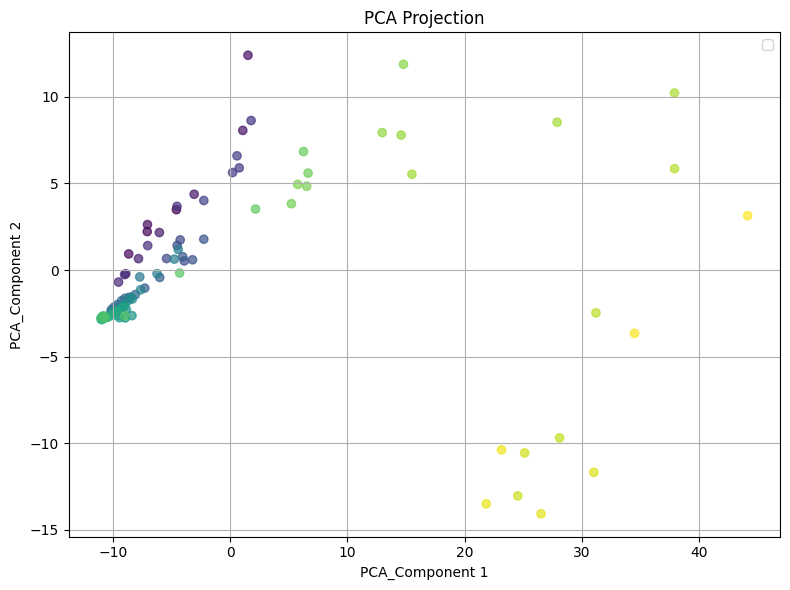

In [46]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_35384\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


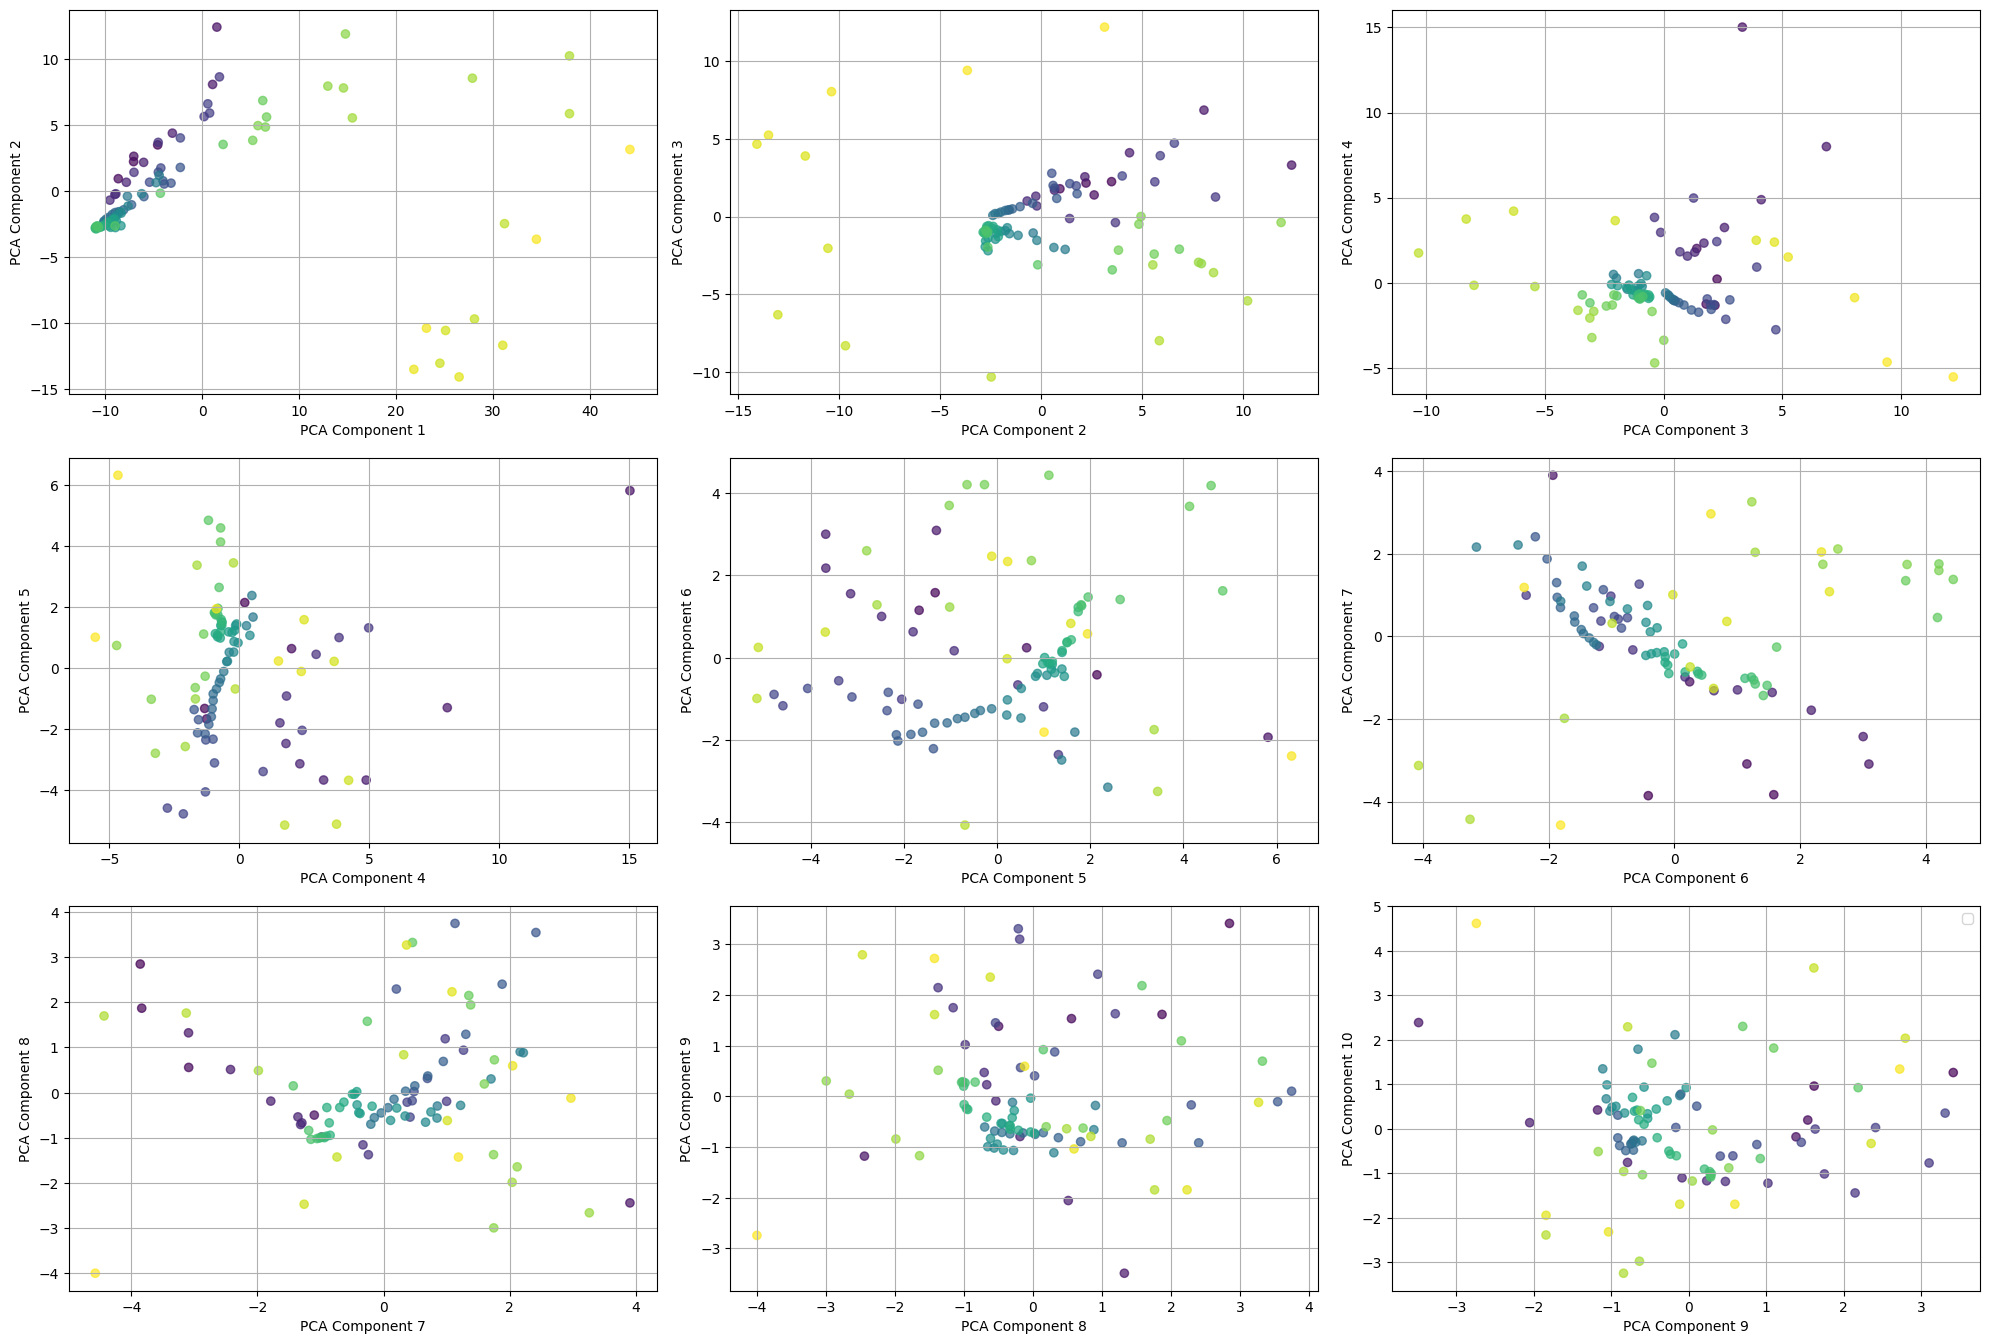

In [47]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [48]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.650
KMeans Davies-Bouldin Index is 0.697


<Axes: xlabel='k'>

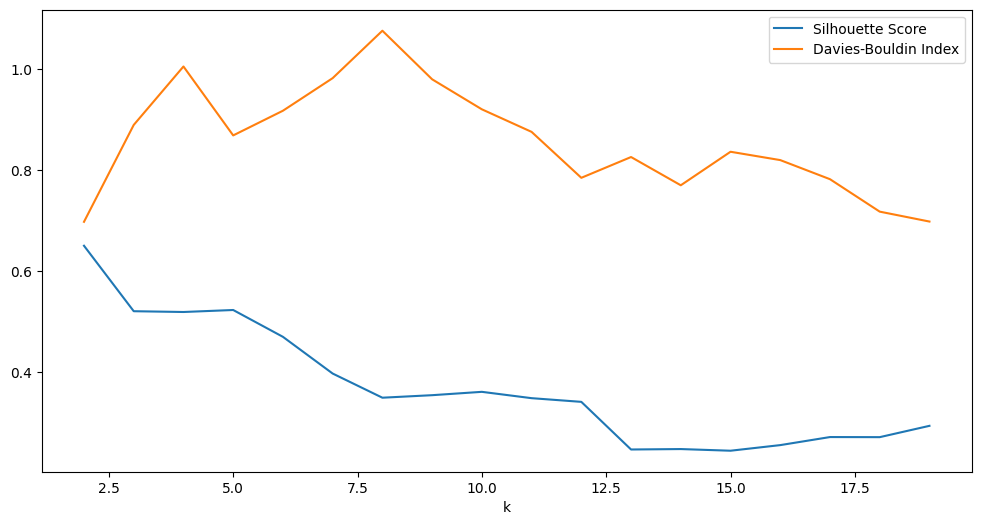

In [49]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         3     80         -0.231549   
1    0.76            3         4     72         -0.126985   
2    1.01            3         5     62         -0.053154   
3    1.27            3         4     57          0.006405   
4    1.52            3         4     56          0.021228   
5    1.78            3         2     55          0.006311   
6    2.03            3         3     51          0.047359   
7    2.29            3         4     47          0.033002   
8    2.54            3         3     47          0.059657   
9    2.80            3         3     43          0.063136   
10   3.05            3         2     39          0.116464   
11   3.31            3         2     38          0.127950   
12   3.56            3         2     38          0.127950   
13   3.82            3         2     36          0.132481   
14   4.07            3         3     31          0.110918   
15   4.33            3         3     30          0.124346   
16   4.58            3         4     27          0.121794   
17   4.84            3         3     27          0.330728   
18   5.09            3         3     26          0.334319   
19   5.35            3         4     23          0.294050   
20   5.60            3         3     23          0.335267   
21   5.86            3         3     21          0.364263   
22   6.11            3         3     20          0.371234   
23   6.37            3         3     19          0.386311   
24   6.62            3         4     15          0.391259   
25   6.88            3         4     13          0.403828   
26   7.13            3         4     13          0.403828   
27   7.39            3         4     13          0.403828   
28   7.64            3         4     12          0.414601   
29   7.90            3         4     11          0.422938   
30   8.15            3         5      8          0.432834   
31   8.41            3         5      8          0.432834   
32   8.66            3         5      7          0.435363   
33   8.92            3         5      7          0.435363   
34   9.17            3         4      7          0.506582   
35   9.43            3         4      7          0.506582   
36   9.68            3         4      7          0.506582   
37   9.94            3         3      7          0.594933   
38  10.19            3         3      7          0.594933   
39  10.45            3         3      6          0.597771   
40  10.70            3         3      6          0.597771   
41  10.96            3         2      6          0.616449   
42  11.21            3         2      6          0.616449   
43  11.47            3         2      6          0.616449   
44  11.72            3         2      6          0.616449   
45  11.98            3         2      6          0.616449   
46  12.23            3         2      6          0.616449   
47  12.49            3         3      3          0.615235   
48  12.74            3         3      3          0.615235   
49  13.00            3         3      3          0.615235   

    Davies-Bouldin Index  
0               1.166794  
1               1.144392  
2               1.107341  
3               1.079298  
4               1.064831  
5               1.135832  
6               1.075385  
7               1.155342  
8               1.185041  
9               1.128947  
10              1.077094  
11              1.059342  
12              1.059342  
13              1.163471  
14              1.741882  
15              1.742909  
16              1.881378  
17              1.960671  
18              1.931597  
19              1.693712  
20              1.803045  
21              1.597584  
22              1.523815  
23              1.397160  
24              1.440029  
25              1.188138  
26              1.188138  
27              1.188138  
28              1.168890  
29              1.232893  
30              1.230965  
31              1.230965  
32 

<Axes: xlabel='eps'>

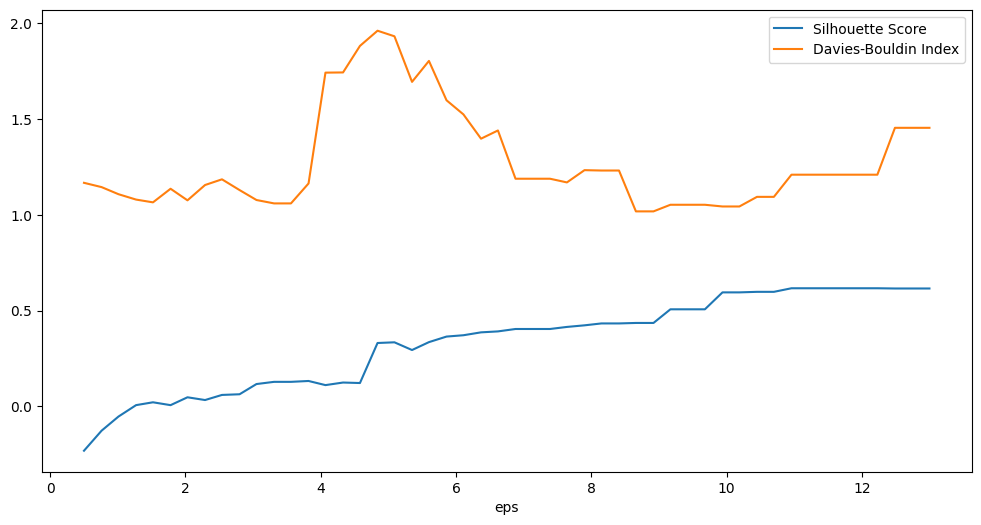

In [50]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

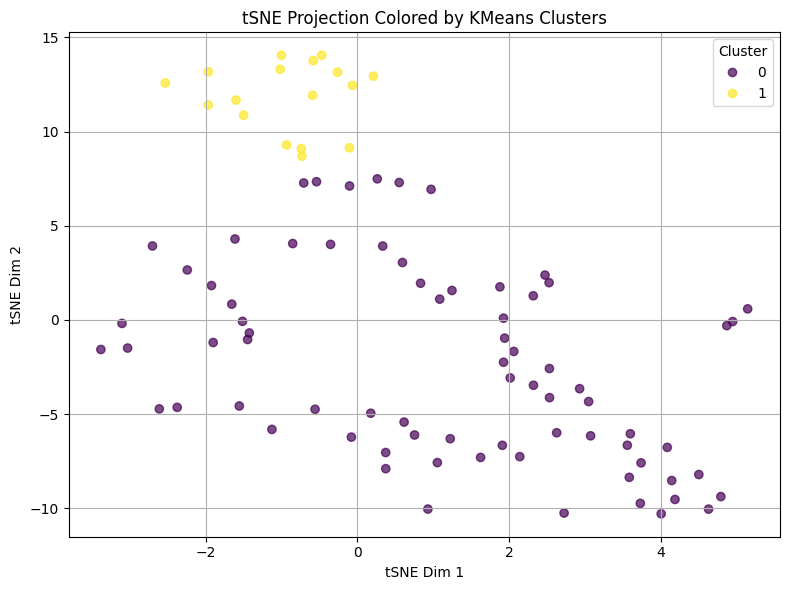

In [51]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.05            2         6    253          0.997723   
1    0.05            2         6    253          0.997723   
2    0.06            2         6    253          0.997723   
3    0.06            2         6    253          0.997723   
4    0.07            2         6    253          0.997723   
..    ...          ...       ...    ...               ...   
195  0.98            2        32    150          0.465829   
196  0.99            2        32    150          0.465829   
197  0.99            2        34    146          0.467485   
198  1.00            2        34    146          0.467485   
199  1.00            2        34    145          0.464501   

     Davies-Bouldin Index  
0                0.003262  
1                0.003262  
2                0.003262  
3                0.003262  
4                0.003262  
..                    ...  
195              0.460304  
196              0.460304  
197              0.468655  
198              0.468655  
199              0.468294  

[200 rows x 6 columns]

<Axes: xlabel='eps'>

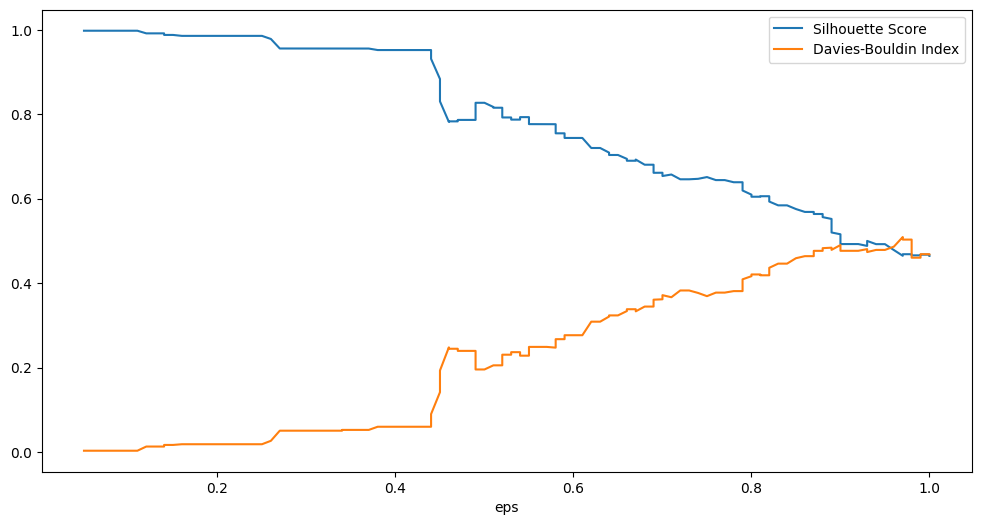

In [52]:
#For dbscan spatial plotting

data = season_df.T.copy()
data_scaled = (data - data.mean()) / data.std(ddof=0)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_scaled)

obs_ids = data.index

eps_values = np.linspace(0.05, 1.0, 200)
min_samples = 2

dbscan_results = []

#addtions
dbscan_lavels = None
best_eps = None
best_silhouette = -999

#x = pca_result.values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(pca_result[mask], labels[mask])
        db_index = davies_bouldin_score(pca_result[mask], labels[mask])
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

    if silhouette is not None and silhouette > best_silhouette:
        best_silhouette = silhouette
        best_labels = labels.copy()
        best_eps = eps

#saving for dbscan for spatial plotting
dbscan_eval_df = pd.DataFrame(dbscan_results)
dbscan_eval_df.to_csv(out_path / f"DBSCAN_Scores_season{str(season)}_seasonYear_{str(season_year)}.csv", index=False)

# print(f"eps={eps:.2f}, clusters={n_clusters}, noise={n_noise}")
# print("obs_ids length:", len(obs_ids))
# print("best_labels length:", len(best_labels))
# print("pca_result rows:", pca_result.shape[0])
# print("data_scaled rows:", data_scaled.shape[0])
# print("season_df.T rows:", season_df.T.shape[0])

# print("NaNs in data:", data.isna().sum().sum())
# print("NaNs in data_scaled:", data_scaled.isna().sum().sum())

#Use this file here 
dbscan_labels_df = pd.DataFrame({
    "obsstednr": obs_ids, #pca_result.index.to_list(), 
    "Cluster":best_labels,
    "eps_used": best_eps,
    "min_samples": min_samples})
dbscan_labels_df.to_csv(out_path / f"DBSCAN_Cluster_labels_season_{str(season)}_seasonYear{str(season_year)}.csv", index=False)
# from pathlib import Path



display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

#### Winter (4)

In [53]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

In [54]:
season = 4
season_year = 2015
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids]
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 91 entries, 2015-12-01 to 2016-02-29
Columns: 239 entries, 10000009 to 9000015
dtypes: float64(239)
memory usage: 170.6 KB


None

            10000009  10000010  10000011  10000014  10000016  10000017  \
2015-12-01  3.650082  1.608496  2.162175  1.708188  0.812482  0.799830   
2015-12-02  2.806651  1.175642  1.312040  1.573285  0.726096  0.714789   
2015-12-03  1.776515  0.954408  1.024667  1.452992  0.735111  0.723664   
2015-12-04  1.741618  1.057820  1.193883  1.465346  0.887274  0.873457   
2015-12-05  1.920728  1.143767  1.619420  1.522746  1.029487  1.013456   
...              ...       ...       ...       ...       ...       ...   
2016-02-25  1.418118  1.065345  1.067233  1.300102  0.910455  0.896277   
2016-02-26  1.346360  0.979979  0.973866  1.227420  0.872604  0.859016   
2016-02-27  1.255622  0.925423  0.852317  1.168073  0.847597  0.834398   
2016-02-28  1.191515  0.883701  0.781527  1.124972  0.824085  0.811253   
2016-02-29  1.137618  0.855662  0.737715  1.086639  0.809601  0.796994   

            11000011  11000016  12000001  13000011  ...  63000007  64000025  \
2015-12-01  3.578419  4.036934  

          2015-12-01  2015-12-02  2015-12-03  2015-12-04  2015-12-05  \
10000009    1.059188    0.579141   -0.318534   -0.384773   -0.231962   
10000010   -0.808871   -1.039500   -1.141136   -1.045848   -0.923419   
10000011   -0.302253   -0.904136   -1.070835   -0.914307   -0.500111   
10000014   -0.717653   -0.644872   -0.642252   -0.651865   -0.586146   
10000016   -1.537228   -1.485638   -1.360564   -1.210727   -1.025122   
...              ...         ...         ...         ...         ...   
67000019   -0.362472   -0.388835   -0.367444   -0.406294   -0.592902   
7000003     0.889619    1.004470    0.768022    0.563115    0.503700   
8000001     0.461621    0.511789    0.436401    0.376118    0.338837   
9000001     2.110183    2.454687    2.299079    2.204717    2.697560   
9000015     1.809408    2.137160    2.005013    1.918309    2.373443   

          2015-12-06  2015-12-07  2015-12-08  2015-12-09  2015-12-10  ...  \
10000009    0.134350    1.387767    1.308493    0.274323  

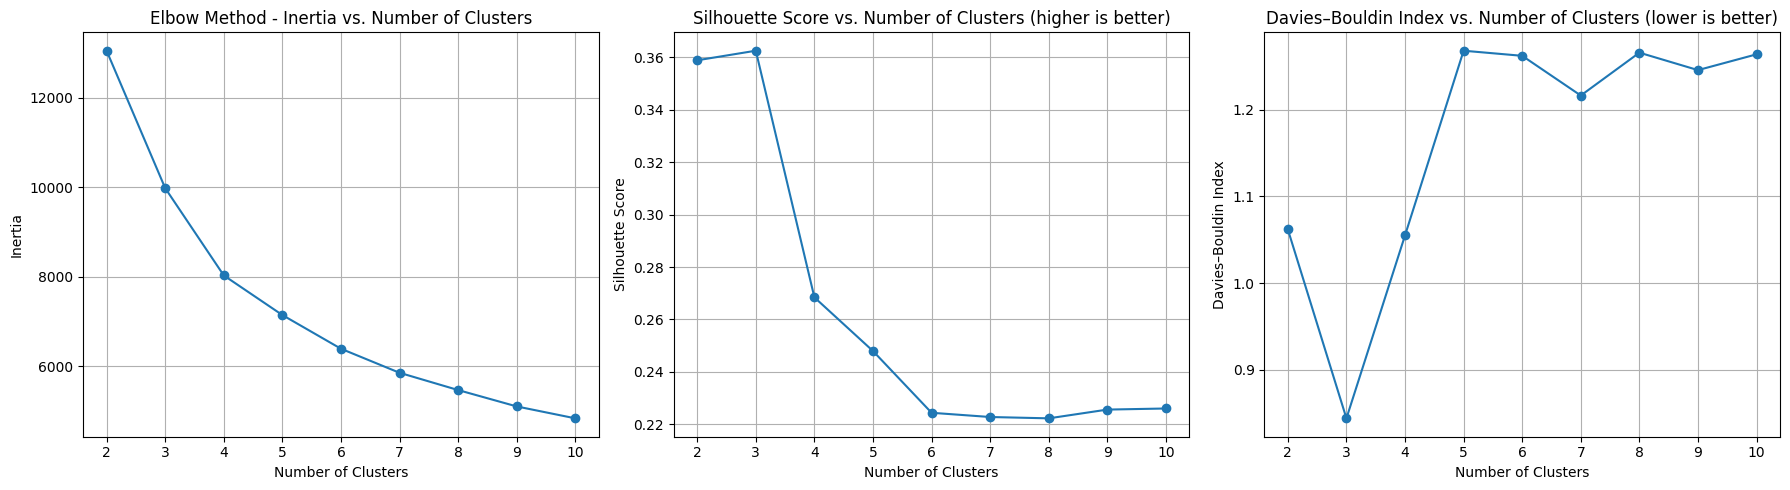

In [55]:
# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        1
10000010        1
10000011        1
10000014        1
10000016        1

            10000009  10000010  10000011  10000014  10000016  10000017  \
2015-12-01  3.650082  1.608496  2.162175  1.708188  0.812482  0.799830   
2015-12-02  2.806651  1.175642  1.312040  1.573285  0.726096  0.714789   
2015-12-03  1.776515  0.954408  1.024667  1.452992  0.735111  0.723664   
2015-12-04  1.741618  1.057820  1.193883  1.465346  0.887274  0.873457   
2015-12-05  1.920728  1.143767  1.619420  1.522746  1.029487  1.013456   
...              ...       ...       ...       ...       ...       ...   
2016-02-25  1.418118  1.065345  1.067233  1.300102  0.910455  0.896277   
2016-02-26  1.346360  0.979979  0.973866  1.227420  0.872604  0.859016   
2016-02-27  1.255622  0.925423  0.852317  1.168073  0.847597  0.834398   
2016-02-28  1.191515  0.883701  0.781527  1.124972  0.824085  0.811253   
2016-02-29  1.137618  0.855662  0.737715  1.086639  0.809601  0.796994   

            11000011  11000016  12000001  13000011  ...  63000007  64000025  \
2015-12-01  3.578419  4.036934  

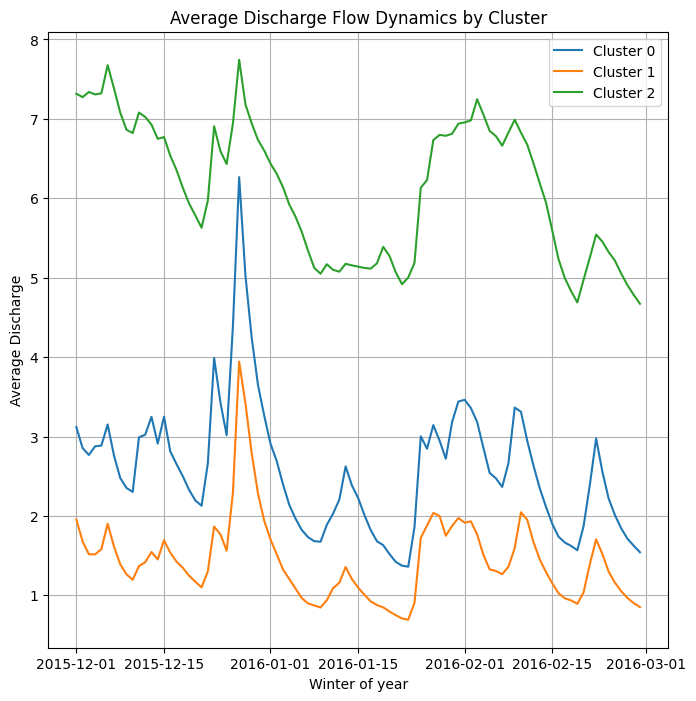

In [56]:
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure(figsize=(8, 8))
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Winter of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [57]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)

In [58]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009  10000010  10000011  10000014  10000016  10000017  \
2015-12-01  3.650082  1.608496  2.162175  1.708188  0.812482  0.799830   
2015-12-02  2.806651  1.175642  1.312040  1.573285  0.726096  0.714789   
2015-12-03  1.776515  0.954408  1.024667  1.452992  0.735111  0.723664   
2015-12-04  1.741618  1.057820  1.193883  1.465346  0.887274  0.873457   
2015-12-05  1.920728  1.143767  1.619420  1.522746  1.029487  1.013456   
...              ...       ...       ...       ...       ...       ...   
2016-02-25  1.418118  1.065345  1.067233  1.300102  0.910455  0.896277   
2016-02-26  1.346360  0.979979  0.973866  1.227420  0.872604  0.859016   
2016-02-27  1.255622  0.925423  0.852317  1.168073  0.847597  0.834398   
2016-02-28  1.191515  0.883701  0.781527  1.124972  0.824085  0.811253   
2016-02-29  1.137618  0.855662  0.737715  1.086639  0.809601  0.796994   

            11000011  11000016  12000001  13000011  ...  63000007  64000025  \
2015-12-01  3.578419  4.036934  2.028177  1.560096  ...  2.505461  2.342452   
2015-12-02  3.677796  3.730742  1.623499  1.292971  ...  2.253838  1.921433   
2015-12-03  3.708009  3.528033  1.506226  1.211979  ...  1.854256  1.647977   
2015-12-04  3.606792  3.751665  1.705651  1.329097  ...  1.460458  1.439286   
2015-12-05  3.628830  3.990112  2.824605  2.206659  ...  1.105857  1.226228   
...              ...       ...       ...       ...  ...       ...       ...   
2016-02-25  2.143691  1.969423  0.937691  1.055993  ...  1.829258  1.322606   
2016-02-26  2.099099  1.766163  0.875266  0.977396  ...  1.513550  1.126958   
2016-02-27  2.050989  1.638339  0.837362  0.917181  ...  1.279869  0.971717   
2016-02-28  1.993434  1.557348  0.818439  0.869505  ...  1.122693  0.853114   
2016-02-29  1.931922  1.496346  0.807970  0.843183  ...  1.006524  0.761439   

            66000014  67000017  67000018  67000019   7000003   8000001  \
2015-12-01  1.547464  1.756363  2.806804  2.096362  3.464761  2.997006   
2015-12-02  1.202357  1.424941  1.953584  1.831279  3.235230  2.738784   
2015-12-03  1.046875  1.281966  1.531839  1.727634  2.862418  2.530996   
2015-12-04  1.005698  1.456583  1.544571  1.719358  2.722089  2.528664   
2015-12-05  0.914384  1.290711  1.343761  1.515155  2.747361  2.562111   
...              ...       ...       ...       ...       ...       ...   
2016-02-25  1.168014  1.418060  1.579403  1.991610  1.983132  2.059557   
2016-02-26  1.045774  1.211154  1.293530  1.696238  1.785940  2.116757   
2016-02-27  0.948811  1.033786  1.127525  1.425383  1.452009  1.782314   
2016-02-28  0.868764  0.906966  1.002437  1.265587  1.246150  1.577708   
2016-02-29  0.831273  0.806574  0.905146  1.130361  1.118746  1.450388   

             9000001   9000015  
2015-12-01  4.798705  4.469990  
2015-12-02  4.696528  4.376575  
2015-12-03  4.392555  4.098666  
2015-12-04  4.420116  4.123864  
2015-12-05  5.212510  4.848312  
...              ...       ...  
2016-02-25  2.297409  2.183117  
2016-02-26  2.380941  2.259717  
2016-02-27  2.314618  2.199038  
2016-02-28  2.268490  2.156834  
2016-02-29  2.232514  2.123918  

[91 rows x 239 columns]

<Axes: >

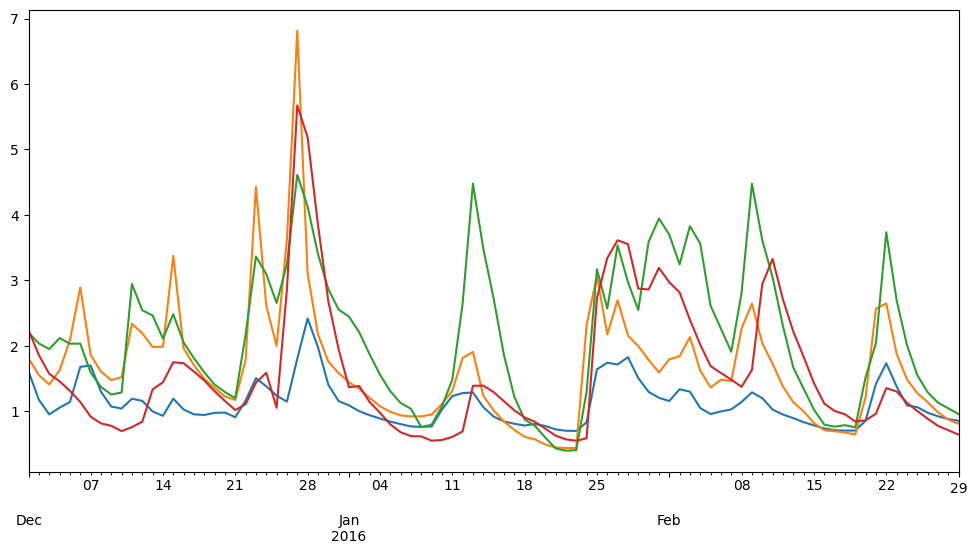

In [59]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

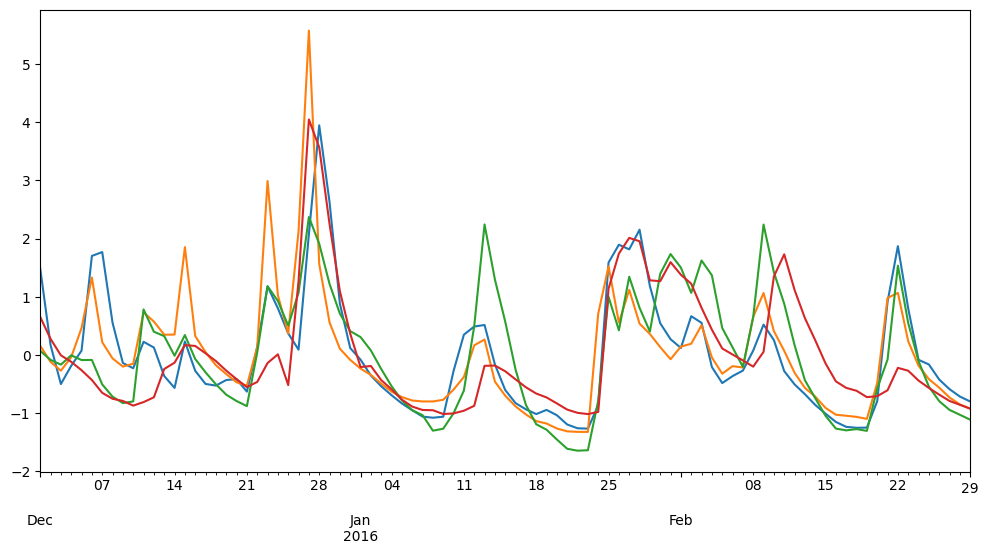

In [60]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

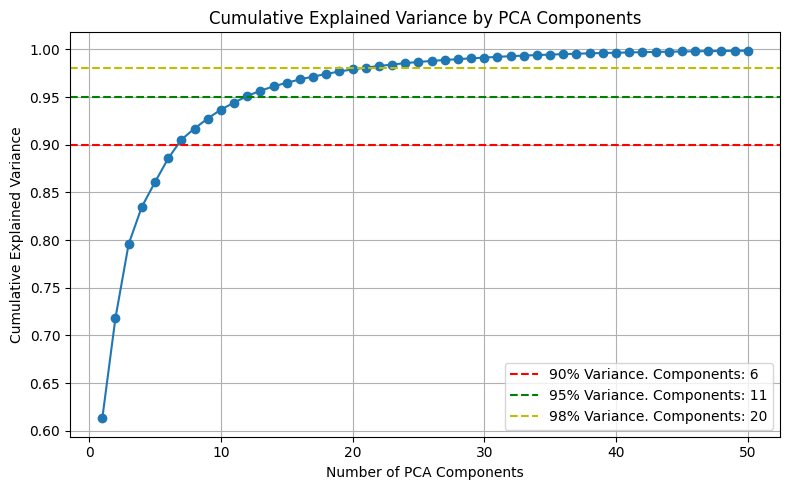

In [61]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [62]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[ 1.09707960e+01,  3.15517787e+00, -6.96573373e+00, ...,
        -9.79514692e-01,  9.27578368e-01, -2.83747561e-01],
       [ 5.43704179e+00,  1.38154719e+00, -7.96817844e+00, ...,
        -3.69678978e-01,  4.60228925e-01, -5.31031286e-01],
       [ 2.47330199e+00,  8.12606299e-01, -7.18975999e+00, ...,
         8.52361408e-02,  6.11613806e-02, -5.05902084e-01],
       ...,
       [-1.23735591e+01, -1.06821077e+00,  2.25832301e+00, ...,
        -2.10492998e-01, -9.52543293e-01,  9.04478988e-02],
       [-1.40126274e+01, -9.21046479e-01,  2.68947466e+00, ...,
        -2.24722770e-01, -1.02603812e+00,  5.30228618e-02],
       [-1.53930794e+01, -7.60557377e-01,  2.97720985e+00, ...,
        -2.19109211e-01, -1.09736177e+00,  1.03783459e-02]],
      shape=(91, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_35384\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


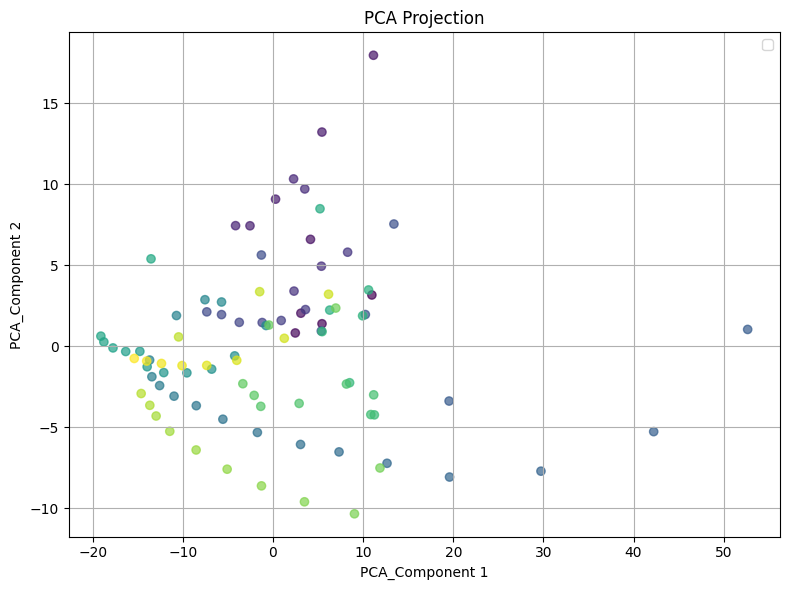

In [63]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_35384\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


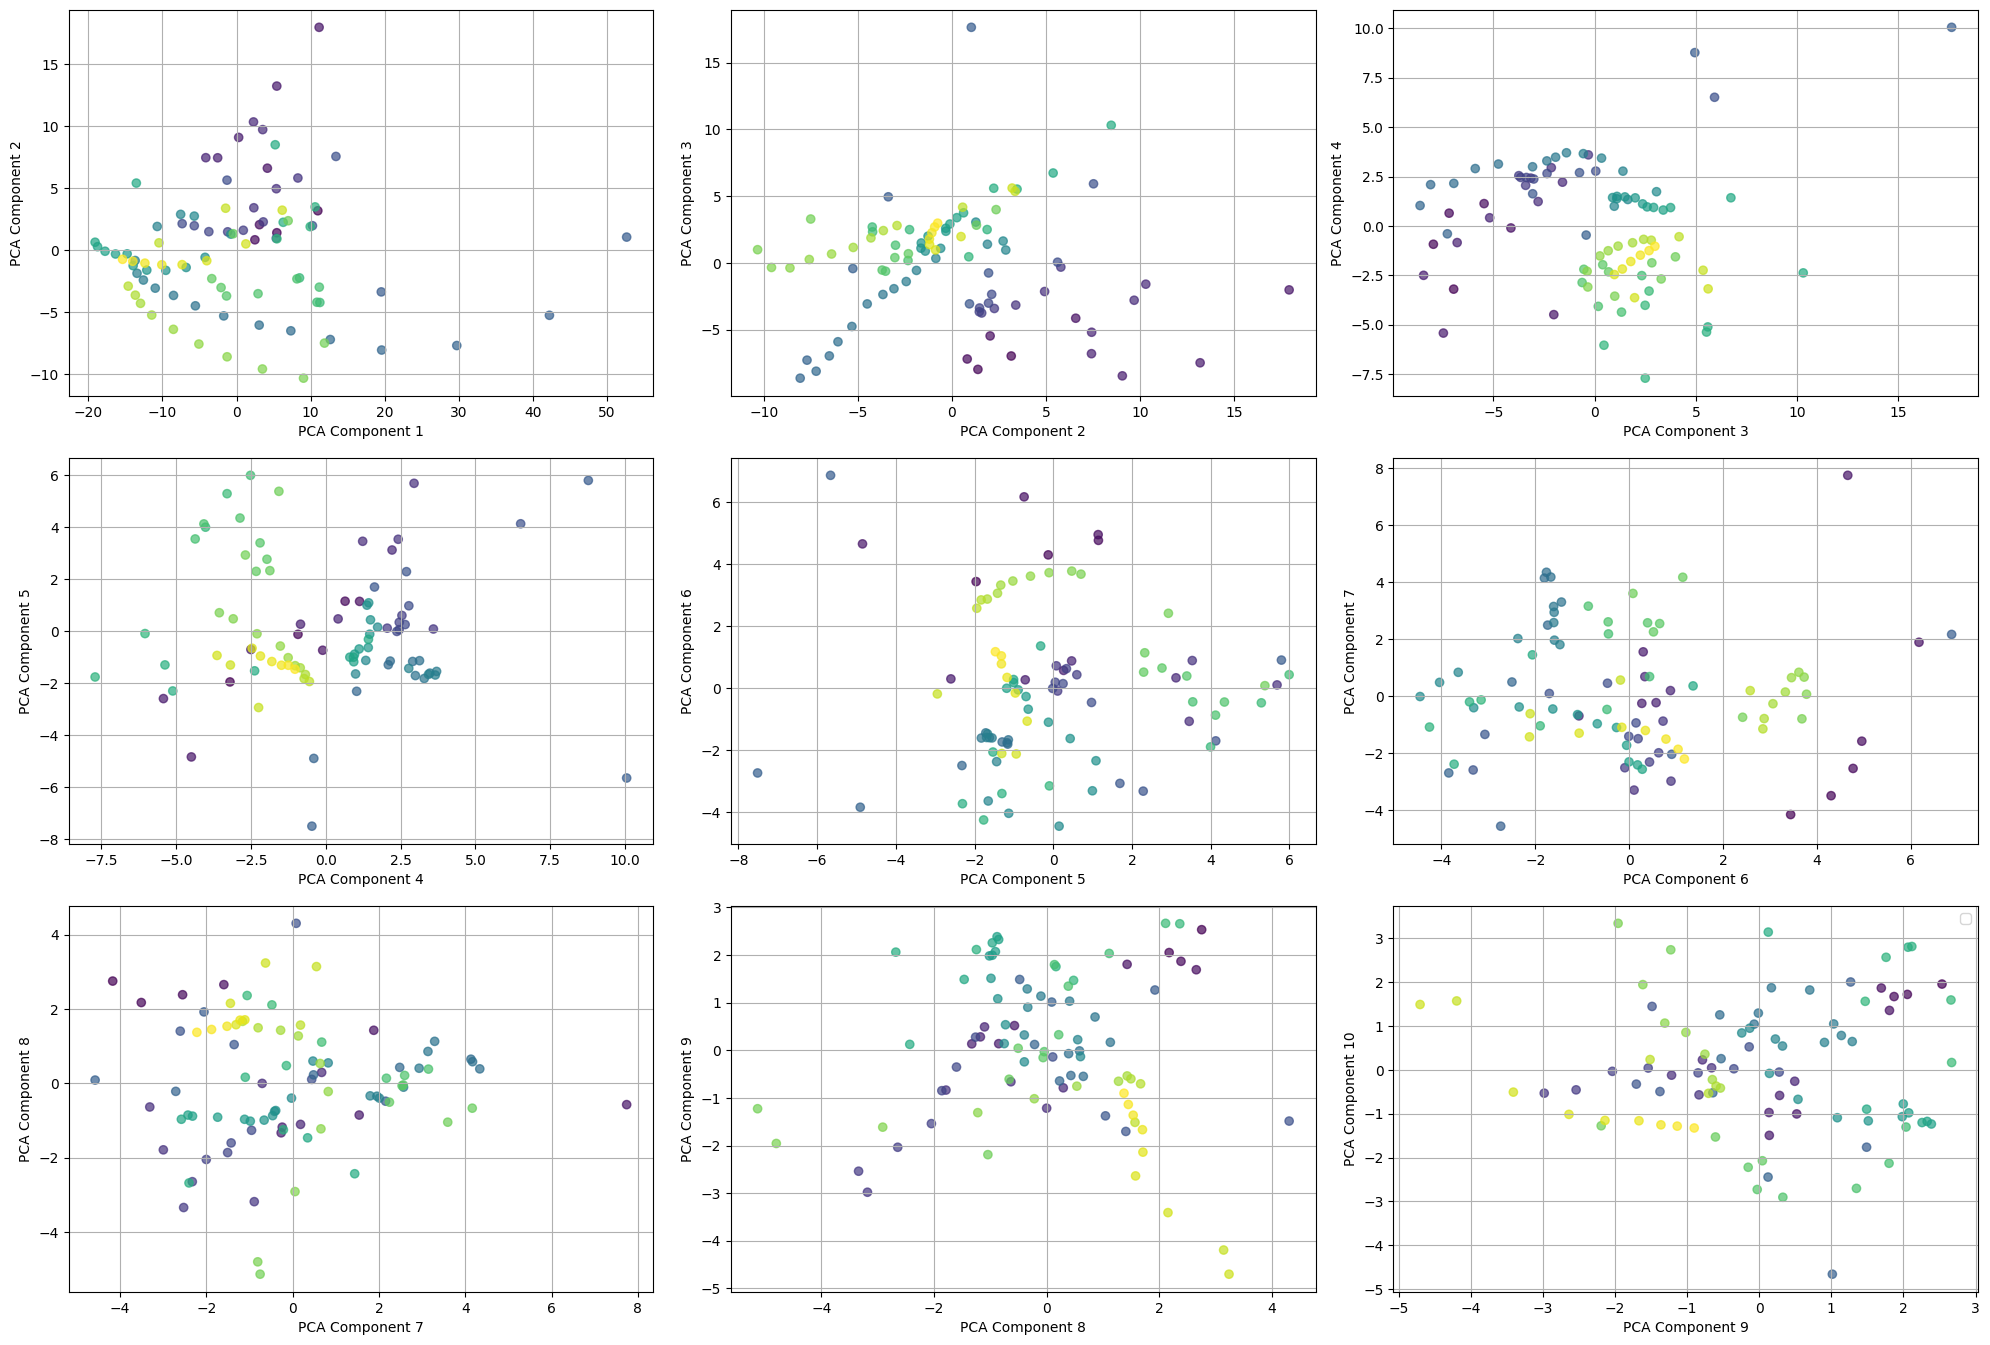

In [64]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [65]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.206
KMeans Davies-Bouldin Index is 1.589


<Axes: xlabel='k'>

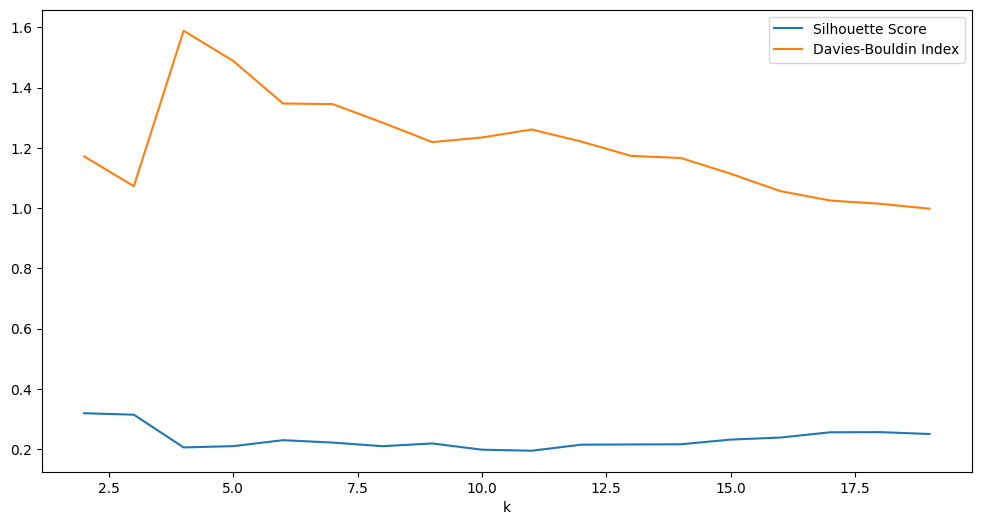

In [66]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         0     91               NaN   
1    0.76            3         0     91               NaN   
2    1.01            3         0     91               NaN   
3    1.27            3         0     91               NaN   
4    1.52            3         2     85          0.008449   
5    1.78            3         3     82          0.006645   
6    2.03            3         5     73         -0.102595   
7    2.29            3         5     71         -0.076549   
8    2.54            3         6     66         -0.056786   
9    2.80            3         6     66         -0.056786   
10   3.05            3         6     62         -0.040683   
11   3.31            3         6     59         -0.047513   
12   3.56            3         6     56         -0.021971   
13   3.82            3         5     56         -0.019433   
14   4.07            3         5     54         -0.016792   
15   4.33            3         6     50         -0.011822   
16   4.58            3         8     43          0.015604   
17   4.84            3         8     39          0.037926   
18   5.09            3         8     38          0.045596   
19   5.35            3         7     34          0.061047   
20   5.60            3         6     32          0.048718   
21   5.86            3         6     30          0.062108   
22   6.11            3         6     28          0.071912   
23   6.37            3         6     24          0.097136   
24   6.62            3         6     22          0.078082   
25   6.88            3         6     21          0.069108   
26   7.13            3         6     20          0.077034   
27   7.39            3         5     15          0.053838   
28   7.64            3         4     12          0.064549   
29   7.90            3         3     12          0.076745   
30   8.15            3         3     10          0.075336   
31   8.41            3         2      9          0.072659   
32   8.66            3         2      8          0.082490   
33   8.92            3         2      7          0.084009   
34   9.17            3         1      7               NaN   
35   9.43            3         1      7               NaN   
36   9.68            3         1      7               NaN   
37   9.94            3         1      7               NaN   
38  10.19            3         1      7               NaN   
39  10.45            3         1      6               NaN   
40  10.70            3         1      6               NaN   
41  10.96            3         1      6               NaN   
42  11.21            3         1      6               NaN   
43  11.47            3         1      6               NaN   
44  11.72            3         1      6               NaN   
45  11.98            3         1      5               NaN   
46  12.23            3         1      4               NaN   
47  12.49            3         1      4               NaN   
48  12.74            3         1      4               NaN   
49  13.00            3         1      4               NaN   

    Davies-Bouldin Index  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4               0.815337  
5               0.831276  
6               1.112725  
7               1.094543  
8               1.103373  
9               1.103373  
10              1.181319  
11              1.377624  
12              1.358615  
13              1.459932  
14              1.459777  
15              1.456642  
16              1.453803  
17              1.548943  
18              1.582241  
19              1.597981  
20              1.503654  
21              1.541702  
22              1.542510  
23              1.696600  
24              1.685548  
25              1.677414  
26              1.711933  
27              1.658331  
28              1.810882  
29              1.784588  
30              1.759564  
31              1.508262  
32 

<Axes: xlabel='eps'>

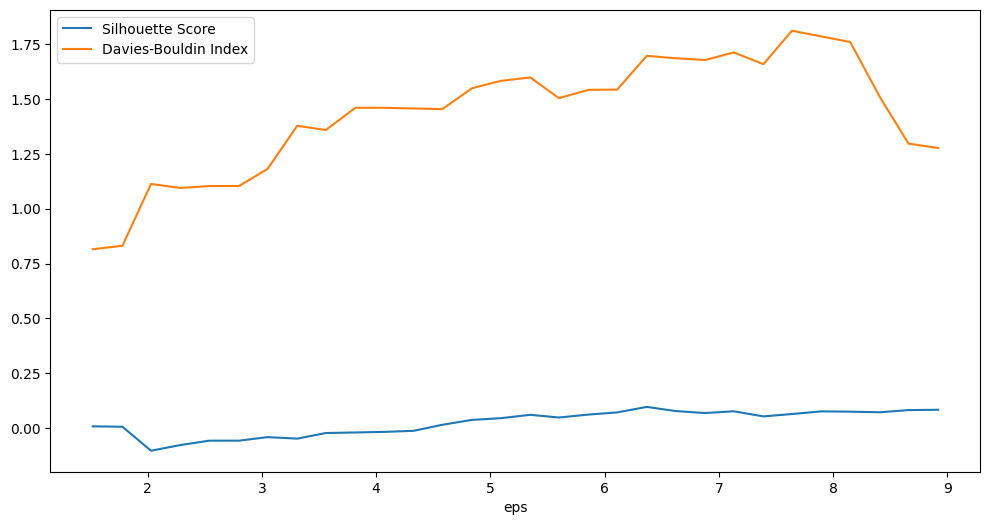

In [67]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

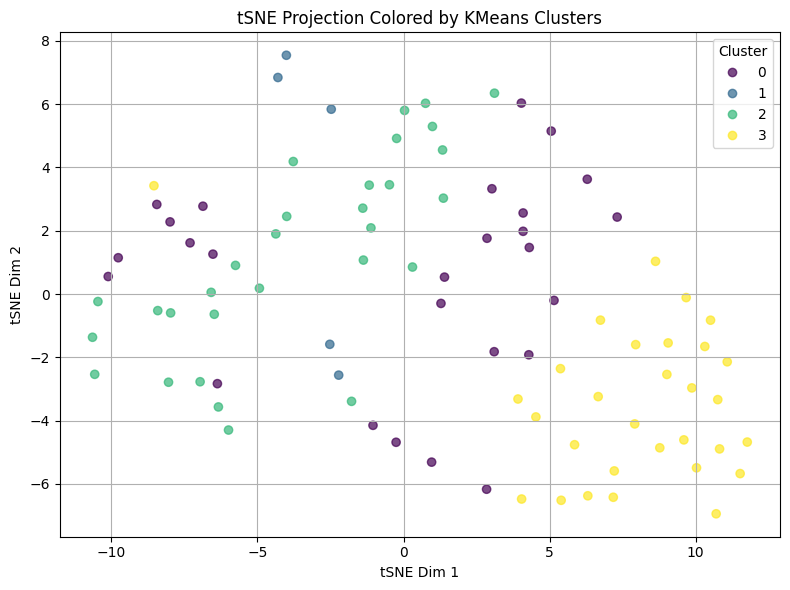

In [68]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.05            2         5    229          0.998119   
1    0.05            2         5    229          0.998119   
2    0.06            2         5    229          0.998119   
3    0.06            2         5    229          0.998119   
4    0.07            2         5    229          0.998119   
..    ...          ...       ...    ...               ...   
195  0.98            2        19    196          0.793365   
196  0.99            2        20    194          0.768195   
197  0.99            2        20    194          0.768195   
198  1.00            2        20    194          0.768195   
199  1.00            2        20    194          0.768195   

     Davies-Bouldin Index  
0                0.001974  
1                0.001974  
2                0.001974  
3                0.001974  
4                0.001974  
..                    ...  
195              0.230640  
196              0.261618  
197              0.261618  
198              0.261618  
199              0.261618  

[200 rows x 6 columns]

<Axes: xlabel='eps'>

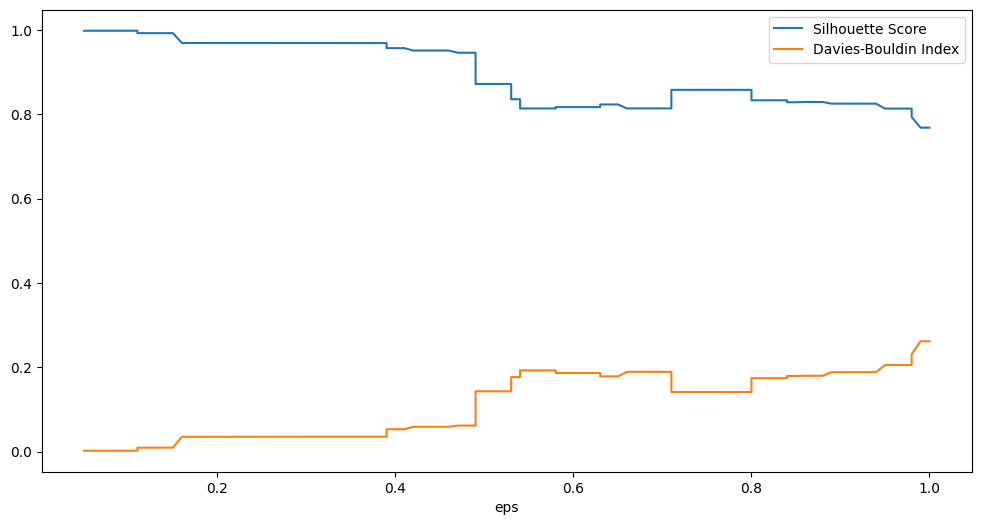

In [69]:
#For dbscan spatial plotting

data = season_df.T.copy()
data_scaled = (data - data.mean()) / data.std(ddof=0)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_scaled)

obs_ids = data.index

eps_values = np.linspace(0.05, 1.0, 200)
min_samples = 2

dbscan_results = []

#addtions
dbscan_lavels = None
best_eps = None
best_silhouette = -999

#x = pca_result.values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(pca_result[mask], labels[mask])
        db_index = davies_bouldin_score(pca_result[mask], labels[mask])
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

    if silhouette is not None and silhouette > best_silhouette:
        best_silhouette = silhouette
        best_labels = labels.copy()
        best_eps = eps

#saving for dbscan for spatial plotting
dbscan_eval_df = pd.DataFrame(dbscan_results)
dbscan_eval_df.to_csv(out_path / f"DBSCAN_Scores_season{str(season)}_seasonYear_{str(season_year)}.csv", index=False)

# print(f"eps={eps:.2f}, clusters={n_clusters}, noise={n_noise}")
# print("obs_ids length:", len(obs_ids))
# print("best_labels length:", len(best_labels))
# print("pca_result rows:", pca_result.shape[0])
# print("data_scaled rows:", data_scaled.shape[0])
# print("season_df.T rows:", season_df.T.shape[0])

# print("NaNs in data:", data.isna().sum().sum())
# print("NaNs in data_scaled:", data_scaled.isna().sum().sum())

#Use this file here 
dbscan_labels_df = pd.DataFrame({
    "obsstednr": obs_ids, #pca_result.index.to_list(), 
    "Cluster":best_labels,
    "eps_used": best_eps,
    "min_samples": min_samples})
dbscan_labels_df.to_csv(out_path / f"DBSCAN_Cluster_labels_season_{str(season)}_seasonYear{str(season_year)}.csv", index=False)
# from pathlib import Path



display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))